### Objective: To develop and test new training scripts. 

Below, I train training scripts using the CIC (cross-interaction chromatography) data from Jain et al. 2017


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from developability.modeling import *
from developability.utils import ls


In [2]:
data_path  = Path('/Users/ChristopherRivera/Documents/DataResults/TherapeuticAntibodies/datasets')
ls(data_path, True)
# Load data
fname = data_path/'predicted_antibody_descriptor_10-08-2023.csv'
descriptors_df = pd.read_csv(fname, index_col = 'antibody').sort_index()
print(len(descriptors_df))
descriptors_df.head()


128


Heparin  FcRn  HCDR1_APBS_pos  HCDR1_APBS_neg  HCDR1_APBS_net  \
antibody                                                                     
abituzumab      0.60  0.32     1604.471203        0.000000     1604.471203   
abrilumab       0.51 -0.17        0.000000    -2753.935986    -2753.935986   
adalimumab      0.79  1.04      361.422343     -794.503791     -433.081449   
alemtuzumab     0.70  0.09     1532.439237        0.000000     1532.439237   
alirocumab      0.56  0.36      631.289590        0.000000      631.289590   

             HCDR2_APBS_pos  HCDR2_APBS_neg  HCDR2_APBS_net  HCDR3_APBS_pos  \
antibody                                                                      
abituzumab      1940.449127    -5937.638320    -3997.189194     4429.654847   
abrilumab        938.671592   -16752.187679   -15813.516087        0.000000   
adalimumab      1555.624126    -4014.715450    -2459.091324     2875.086488   
alemtuzumab    14369.230068        0.000000    14369.230068     4886.091340   
alirocumab      4664.069019     -636.464896     4027.604123       99.814248   

             HCDR3_APBS_neg  ...   LC_APBS_net  TOTAL_CDR_APBS_pos  \
antibody                     ...                                     
abituzumab      -225.665159  ...  15900.359184        14829.202135   
abrilumab      -4053.727671  ...  -8954.480729         1753.188248   
adalimumab      -138.003294  ...  29454.441087        16956.458134   
alemtuzumab        0.000000  ...  46052.387808        36297.176199   
alirocumab     -1564.479393  ...   1903.323660        15333.154779   

             TOTAL_CDR_APBS_neg  TOTAL_CDR_APBS_net  TOTAL_FR_APBS_pos  \
antibody                                                                 
abituzumab         -9417.747157         5411.454979       28200.631931   
abrilumab         -31110.073913       -29356.885665       12442.998322   
adalimumab         -4984.399421        11972.058712       31827.591826   
alemtuzumab            0.000000        36297.176199       70826.600805   
alirocumab         -4761.602345        10571.552434       17188.324287   

             TOTAL_FR_APBS_neg  TOTAL_FR_APBS_net  TOTAL_APBS_pos  \
antibody                                                            
abituzumab       -13994.157768       14206.474164    43029.834066   
abrilumab        -31010.282954      -18567.284632    14196.186570   
adalimumab        -6790.905606       25036.686220    48784.049960   
alemtuzumab        -702.009462       70124.591343   107123.777004   
alirocumab       -16061.033191        1127.291096    32521.479066   

             TOTAL_APBS_neg  TOTAL_APBS_net  
antibody                                     
abituzumab    -23411.904924    19617.929142  
abrilumab     -62120.356867   -47924.170297  
adalimumab    -11775.305027    37008.744932  
alemtuzumab     -702.009462   106421.767542  
alirocumab    -20822.635536    11698.843530  

[5 rows x 71 columns]

In [3]:
fname = data_path/'thAb_invitro_measurements_2017.parquet'
invitro_df = pd.read_parquet(fname)
print(invitro_df.shape)
invitro_df.head()

(137, 12)


HEK Titer (mg/L)  Fab Tm by DSF (°C)  \
Name                                                
abituzumab               89.6                75.5   
abrilumab               100.2                71.0   
adalimumab              134.9                71.0   
alemtuzumab             144.7                74.5   
alirocumab               69.2                71.5   

             SGAC-SINS AS100 ((NH4)2SO4 mM)  HIC Retention Time (Min)a  \
Name                                                                     
abituzumab                            900.0                        9.2   
abrilumab                             900.0                        9.4   
adalimumab                            900.0                        8.8   
alemtuzumab                          1000.0                        8.8   
alirocumab                            900.0                        9.0   

             SMAC Retention Time (Min)a  Slope for Accelerated Stability  \
Name                                                                       
abituzumab                          8.7                             0.06   
abrilumab                           8.7                             0.03   
adalimumab                          8.7                             0.05   
alemtuzumab                         8.7                             0.06   
alirocumab                          8.7                             0.03   

             Poly-Specificity Reagent (PSR) SMP Score (0-1)  \
Name                                                          
abituzumab                                             0.17   
abrilumab                                              0.00   
adalimumab                                             0.00   
alemtuzumab                                            0.00   
alirocumab                                             0.00   

             Affinity-Capture Self-Interaction Nanoparticle Spectroscopy (AC-SINS) ∆λmax (nm) Average  \
Name                                                                                                    
abituzumab                                                 1.5                                          
abrilumab                                                 -0.9                                          
adalimumab                                                 1.1                                          
alemtuzumab                                               -0.8                                          
alirocumab                                                 1.2                                          

             CIC Retention Time (Min)  CSI-BLI Delta Response (nm)  ELISA  \
Name                                                                        
abituzumab                        8.6                         0.00   1.14   
abrilumab                         8.4                        -0.02   1.12   
adalimumab                        8.9                        -0.01   1.08   
alemtuzumab                       8.5                        -0.02   1.16   
alirocumab                        8.8                        -0.01   1.20   

             BVP ELISA  
Name                    
abituzumab        2.72  
abrilumab         1.82  
adalimumab        1.49  
alemtuzumab       1.46  
alirocumab        2.18

In [4]:
feature_cols = descriptors_df.columns[2:]
features = descriptors_df[feature_cols].copy()

# merge with invitro_df
df = features.merge(invitro_df, left_index=True, right_index=True, how='inner')
print(df.shape)
df.head()




(127, 81)


HCDR1_APBS_pos  HCDR1_APBS_neg  HCDR1_APBS_net  HCDR2_APBS_pos  \
abituzumab      1604.471203        0.000000     1604.471203     1940.449127   
abrilumab          0.000000    -2753.935986    -2753.935986      938.671592   
adalimumab       361.422343     -794.503791     -433.081449     1555.624126   
alemtuzumab     1532.439237        0.000000     1532.439237    14369.230068   
alirocumab       631.289590        0.000000      631.289590     4664.069019   

             HCDR2_APBS_neg  HCDR2_APBS_net  HCDR3_APBS_pos  HCDR3_APBS_neg  \
abituzumab     -5937.638320    -3997.189194     4429.654847     -225.665159   
abrilumab     -16752.187679   -15813.516087        0.000000    -4053.727671   
adalimumab     -4014.715450    -2459.091324     2875.086488     -138.003294   
alemtuzumab        0.000000    14369.230068     4886.091340        0.000000   
alirocumab      -636.464896     4027.604123       99.814248    -1564.479393   

             HCDR3_APBS_net  HFR1_APBS_pos  ...  \
abituzumab      4203.989688    9554.111534  ...   
abrilumab      -4053.727671    1572.647590  ...   
adalimumab      2737.083194    5376.458039  ...   
alemtuzumab     4886.091340   17280.688445  ...   
alirocumab     -1464.665145    4387.517131  ...   

             SGAC-SINS AS100 ((NH4)2SO4 mM)  HIC Retention Time (Min)a  \
abituzumab                            900.0                        9.2   
abrilumab                             900.0                        9.4   
adalimumab                            900.0                        8.8   
alemtuzumab                          1000.0                        8.8   
alirocumab                            900.0                        9.0   

             SMAC Retention Time (Min)a  Slope for Accelerated Stability  \
abituzumab                          8.7                             0.06   
abrilumab                           8.7                             0.03   
adalimumab                          8.7                             0.05   
alemtuzumab                         8.7                             0.06   
alirocumab                          8.7                             0.03   

             Poly-Specificity Reagent (PSR) SMP Score (0-1)  \
abituzumab                                             0.17   
abrilumab                                              0.00   
adalimumab                                             0.00   
alemtuzumab                                            0.00   
alirocumab                                             0.00   

             Affinity-Capture Self-Interaction Nanoparticle Spectroscopy (AC-SINS) ∆λmax (nm) Average  \
abituzumab                                                 1.5                                          
abrilumab                                                 -0.9                                          
adalimumab                                                 1.1                                          
alemtuzumab                                               -0.8                                          
alirocumab                                                 1.2                                          

             CIC Retention Time (Min)  CSI-BLI Delta Response (nm)  ELISA  \
abituzumab                        8.6                         0.00   1.14   
abrilumab                         8.4                        -0.02   1.12   
adalimumab                        8.9                        -0.01   1.08   
alemtuzumab                       8.5                        -0.02   1.16   
alirocumab                        8.8                        -0.01   1.20   

             BVP ELISA  
abituzumab        2.72  
abrilumab         1.82  
adalimumab        1.49  
alemtuzumab       1.46  
alirocumab        2.18  

[5 rows x 81 columns]

In [5]:
#save as individual parquet files with one target column 
feature_cols = list(descriptors_df.columns[2:])
target_names = []
for target in invitro_df.columns:
    target_name = '_'.join(target.split(' ')[:2])
    target_names.append(target_name)
    df[feature_cols + [target]].to_parquet(data_path/f'apbs_descriptors_{target_name}_2017.parquet')
    
    


### Look at CIC retention

In [6]:
# Load data for CIC_Retention
target = 'CIC_Retention'
cic_data_path = data_path/f'apbs_descriptors_{target}_2017.parquet'
data = pd.read_parquet(cic_data_path)


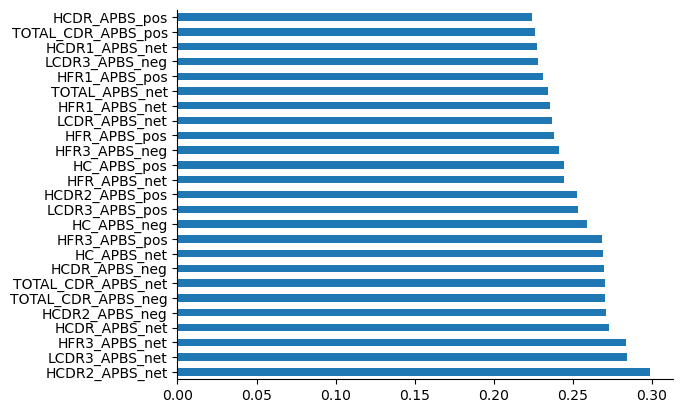

In [7]:
cic_corr = data.corrwith(data['CIC Retention Time (Min)']).sort_values(ascending=False).iloc[1:]
cic_corr.head(25).plot(kind = 'barh')
sns.despine()

/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

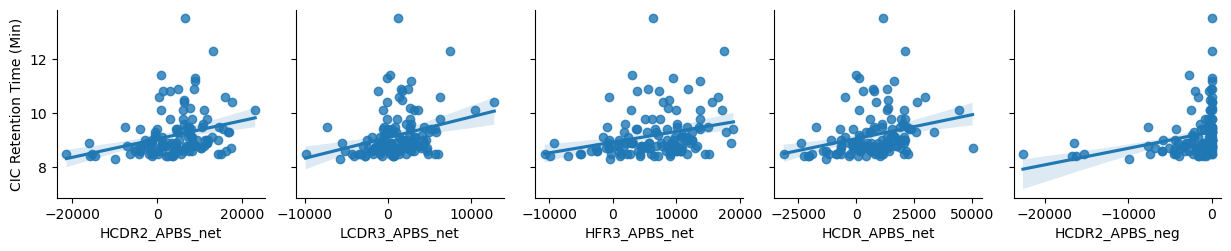

In [8]:
sns.pairplot(data, x_vars = cic_corr.head(5).index, y_vars = 'CIC Retention Time (Min)', kind = 'reg')

### Train a regressor. 

In [9]:
experiment = MLFlowExperiment(data_path = cic_data_path, 
                              target = 'CIC Retention Time (Min)',
                              experiment_name='ThAb_CIC_Retention_Regression_01_19_2024',
                              fit_single_features=True
                              )

2024/01/19 08:14:59 INFO mlflow.tracking.fluent: Experiment with name 'ThAb_CIC_Retention_Regression_01_19_2024' does not exist. Creating a new experiment.


In [10]:
print(experiment.tracking_uri)
print(experiment.experiment_name)

http://127.0.0.1:8080
ThAb_CIC_Retention_Regression_01_19_2024


  0%|          | 0/2 [00:00<?, ?it/s]

Fitting 50 folds for each of 9 candidates, totalling 450 fits
Fitting 50 folds for each of 9 candidates, totalling 450 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features 

Fitting 50 folds for each of 90 candidates, totalling 4500 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.268e+01, tolerance: 7.879e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.049e+01, tolerance: 7.583e-03 Linear regression models with null weight for the l1 regularization term are more ef

Fitting 50 folds for each of 24 candidates, totalling 1200 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Fitting 50 folds for each of 24 candidates, totalling 1200 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 50%|█████     | 1/2 [01:05<01:05, 65.46s/it]

Fitting 50 folds for each of 9 candidates, totalling 450 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Fitting 50 folds for each of 9 candidates, totalling 450 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features 

Fitting 50 folds for each of 90 candidates, totalling 4500 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.232e+01, tolerance: 7.879e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.027e+01, tolerance: 7.583e-03 Linear regression models with null weight for the l1 regularization term are more ef

Fitting 50 folds for each of 24 candidates, totalling 1200 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Fitting 50 folds for each of 24 candidates, totalling 1200 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
  0%|          | 0/69 [00:00<?, ?it/s]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/Projects/developability/developability/modeling.py:117: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,1, figsize=(8, 6))
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/microma

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
  3%|▎         | 2/69 [00:04<02:17,  2.05s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
  4%|▍         | 3/69 [00:05<02:01,  1.84s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
  6%|▌         | 4/69 [00:07<01:55,  1.78s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
  7%|▋         | 5/69 [00:09<01:54,  1.78s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
  9%|▊         | 6/69 [00:10<01:47,  1.71s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 10%|█         | 7/69 [00:12<01:44,  1.68s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 12%|█▏        | 8/69 [00:14<01:41,  1.66s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 13%|█▎        | 9/69 [00:15<01:40,  1.67s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 14%|█▍        | 10/69 [00:17<01:39,  1.68s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 16%|█▌        | 11/69 [00:19<01:36,  1.66s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 17%|█▋        | 12/69 [00:20<01:34,  1.65s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 19%|█▉        | 13/69 [00:22<01:33,  1.67s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 20%|██        | 14/69 [00:24<01:32,  1.68s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 22%|██▏       | 15/69 [00:25<01:29,  1.66s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 23%|██▎       | 16/69 [00:27<01:26,  1.63s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 25%|██▍       | 17/69 [00:29<01:26,  1.66s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 26%|██▌       | 18/69 [00:30<01:23,  1.63s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 28%|██▊       | 19/69 [00:32<01:22,  1.64s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 29%|██▉       | 20/69 [00:34<01:20,  1.64s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 30%|███       | 21/69 [00:35<01:17,  1.62s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 32%|███▏      | 22/69 [00:37<01:17,  1.65s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 33%|███▎      | 23/69 [00:38<01:15,  1.65s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 35%|███▍      | 24/69 [00:40<01:15,  1.67s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 36%|███▌      | 25/69 [00:42<01:13,  1.68s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 38%|███▊      | 26/69 [00:43<01:11,  1.65s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 39%|███▉      | 27/69 [00:45<01:09,  1.65s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 41%|████      | 28/69 [00:47<01:07,  1.64s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 42%|████▏     | 29/69 [00:48<01:05,  1.65s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 43%|████▎     | 30/69 [00:50<01:05,  1.69s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 45%|████▍     | 31/69 [00:52<01:03,  1.66s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 46%|████▋     | 32/69 [00:53<01:01,  1.65s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 48%|████▊     | 33/69 [00:55<00:58,  1.64s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 49%|████▉     | 34/69 [00:57<00:57,  1.65s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 51%|█████     | 35/69 [00:58<00:55,  1.64s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 52%|█████▏    | 36/69 [01:00<00:54,  1.66s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 54%|█████▎    | 37/69 [01:02<00:52,  1.65s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 55%|█████▌    | 38/69 [01:03<00:50,  1.64s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 57%|█████▋    | 39/69 [01:05<00:50,  1.67s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 58%|█████▊    | 40/69 [01:07<00:48,  1.66s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 59%|█████▉    | 41/69 [01:08<00:46,  1.67s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 61%|██████    | 42/69 [01:10<00:44,  1.64s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 62%|██████▏   | 43/69 [01:12<00:42,  1.63s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 64%|██████▍   | 44/69 [01:13<00:40,  1.63s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 65%|██████▌   | 45/69 [01:15<00:39,  1.64s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 67%|██████▋   | 46/69 [01:16<00:37,  1.64s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 68%|██████▊   | 47/69 [01:18<00:36,  1.68s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 70%|██████▉   | 48/69 [01:20<00:35,  1.67s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 71%|███████   | 49/69 [01:22<00:33,  1.69s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 72%|███████▏  | 50/69 [01:23<00:31,  1.67s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 74%|███████▍  | 51/69 [01:25<00:29,  1.66s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 75%|███████▌  | 52/69 [01:26<00:27,  1.64s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 77%|███████▋  | 53/69 [01:28<00:26,  1.63s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 78%|███████▊  | 54/69 [01:30<00:24,  1.63s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 80%|███████▉  | 55/69 [01:31<00:22,  1.62s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 81%|████████  | 56/69 [01:33<00:21,  1.62s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 83%|████████▎ | 57/69 [01:35<00:19,  1.62s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 84%|████████▍ | 58/69 [01:36<00:17,  1.61s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 86%|████████▌ | 59/69 [01:38<00:16,  1.64s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 87%|████████▋ | 60/69 [01:39<00:14,  1.64s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 88%|████████▊ | 61/69 [01:41<00:13,  1.64s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 90%|████████▉ | 62/69 [01:43<00:11,  1.65s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 91%|█████████▏| 63/69 [01:44<00:09,  1.63s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 93%|█████████▎| 64/69 [01:46<00:08,  1.64s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 94%|█████████▍| 65/69 [01:48<00:06,  1.64s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 96%|█████████▌| 66/69 [01:49<00:04,  1.65s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 97%|█████████▋| 67/69 [01:51<00:03,  1.68s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
 99%|█████████▊| 68/69 [01:53<00:01,  1.67s/it]

Fitting 50 folds for each of 1 candidates, totalling 50 fits


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
100%|██████████| 69/69 [01:54<00:00,  1.66s/it]


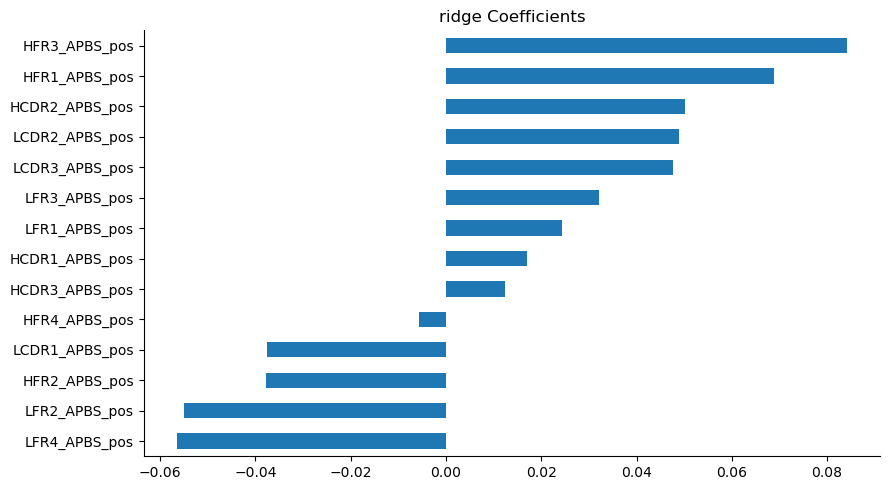

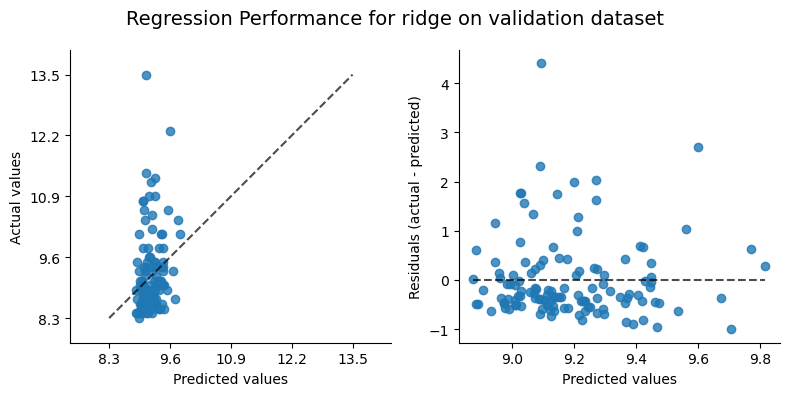

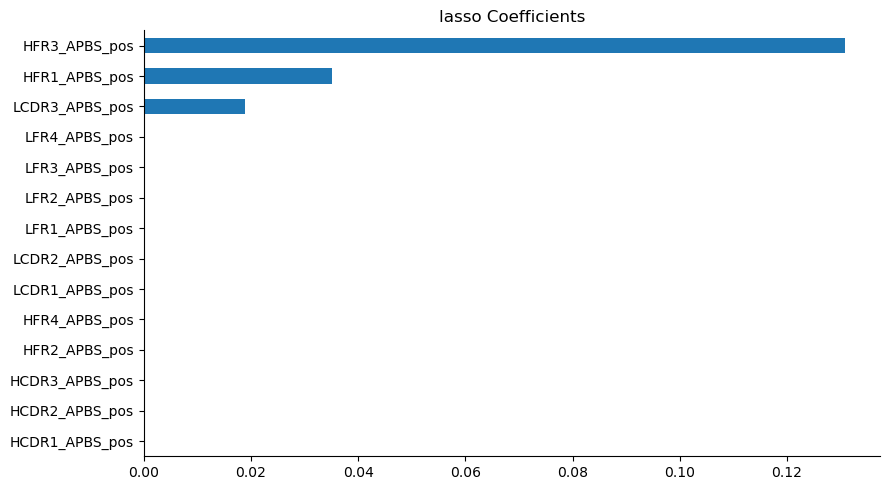

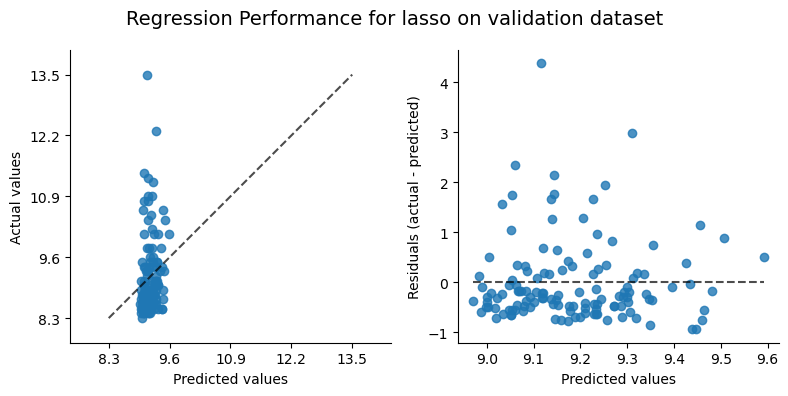

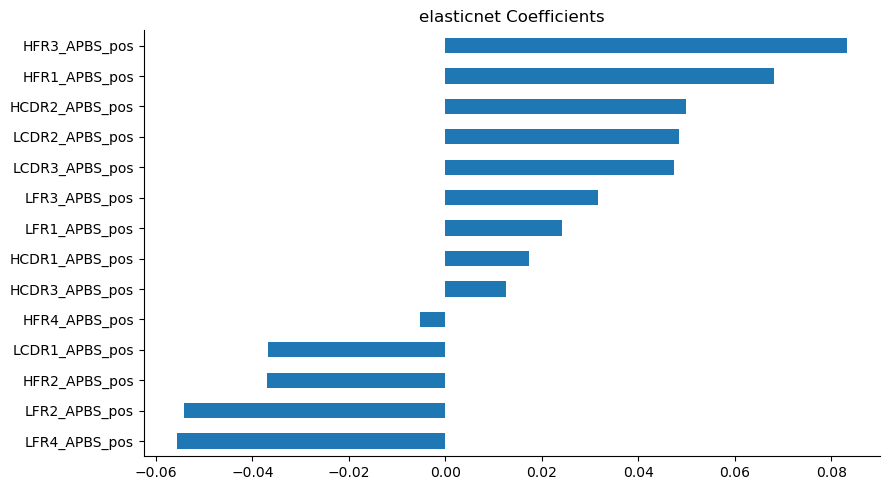

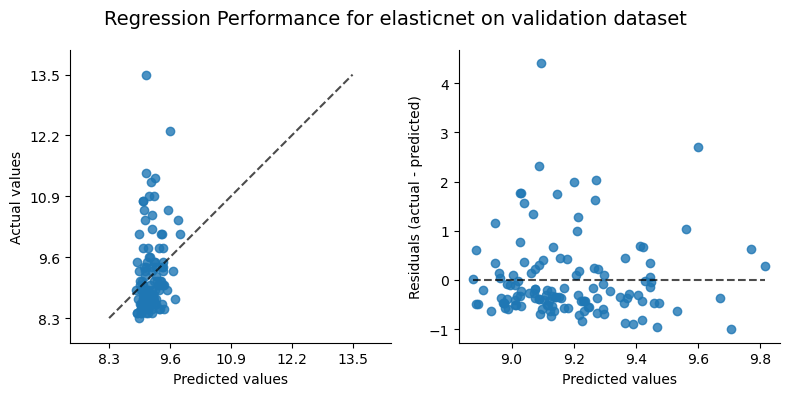

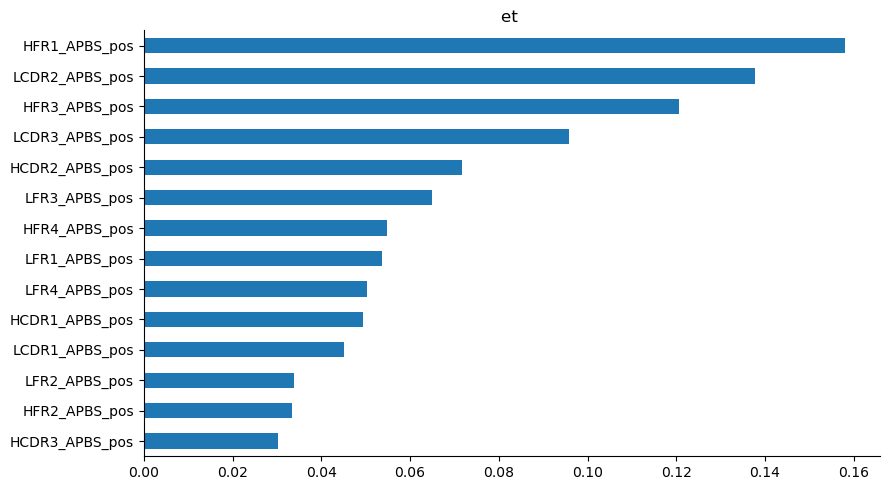

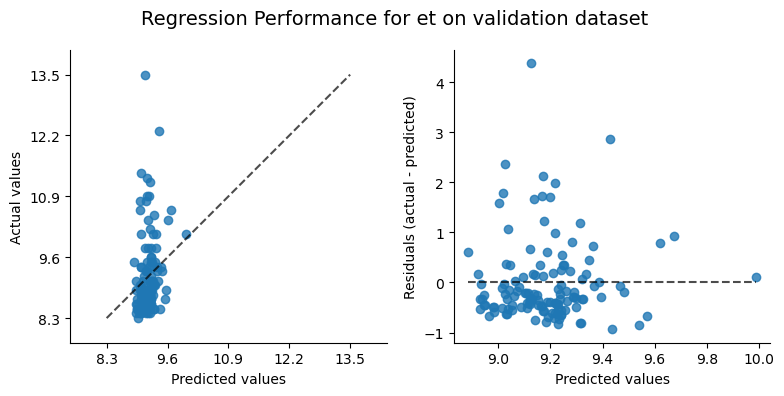

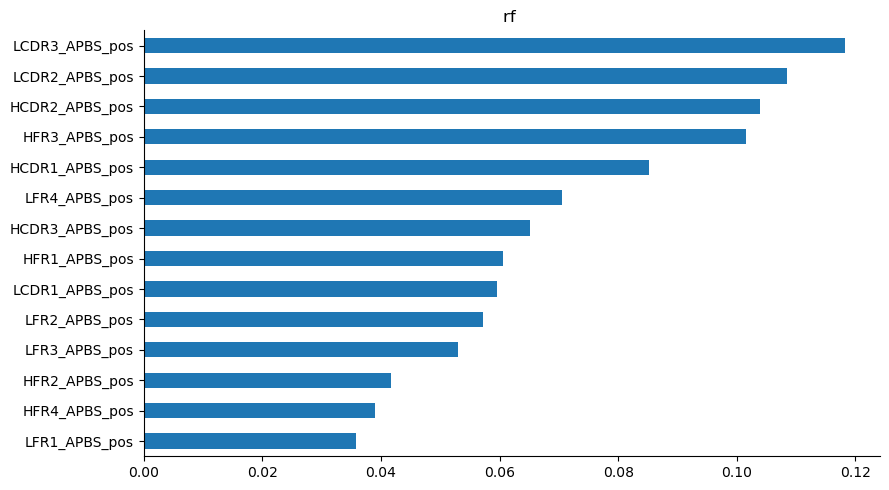

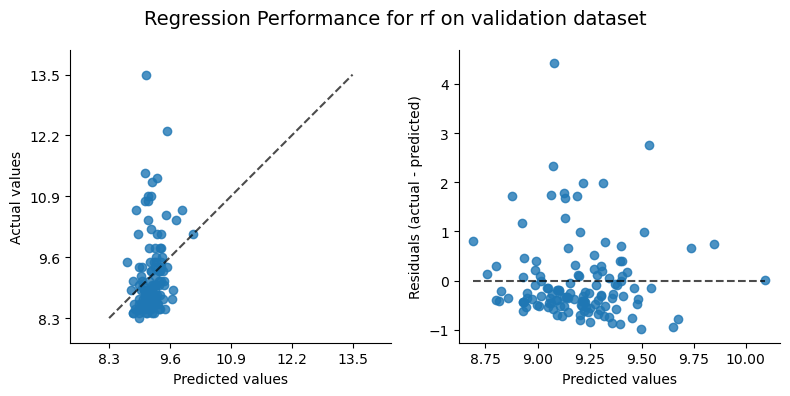

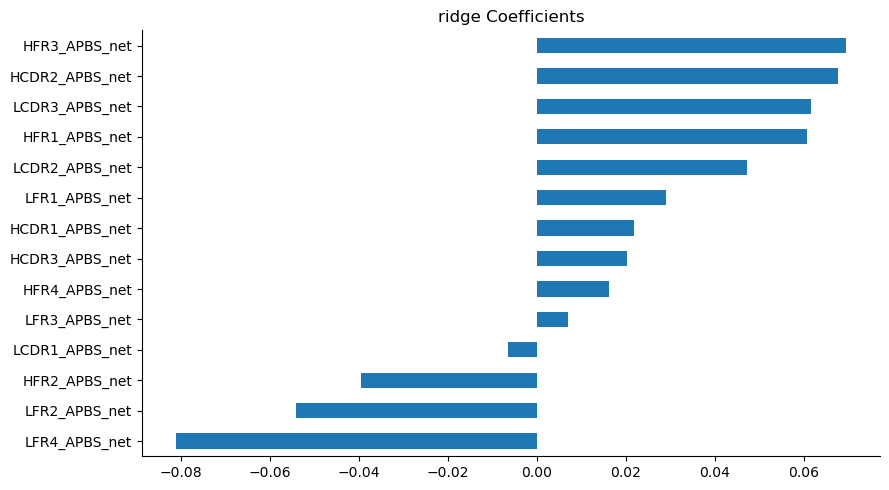

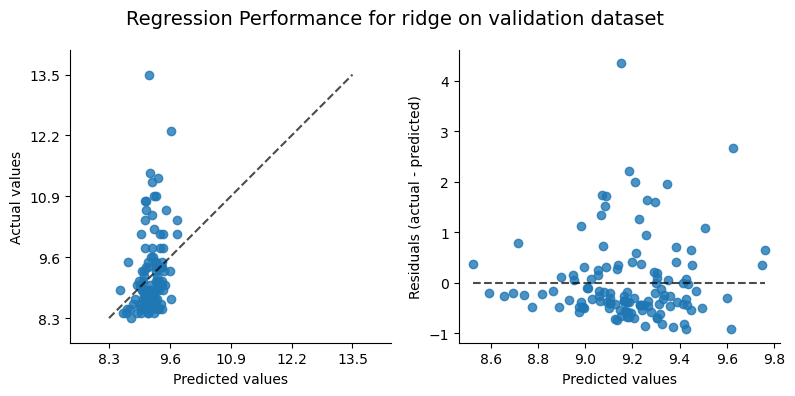

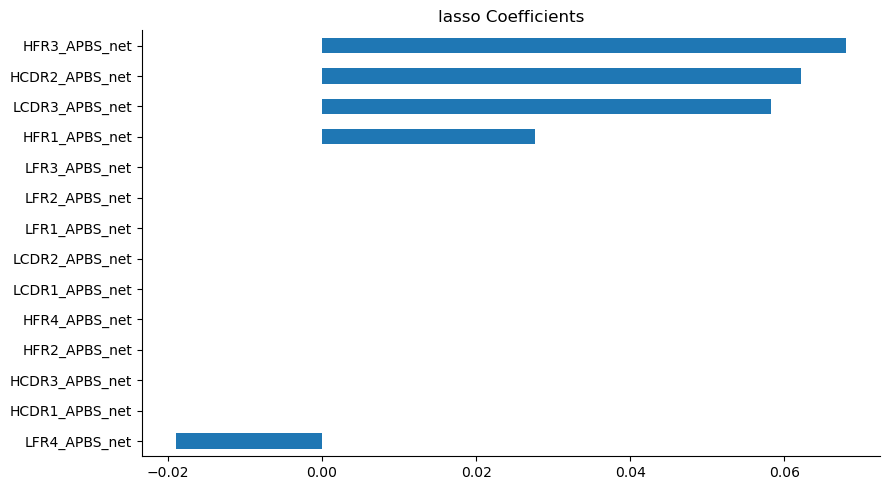

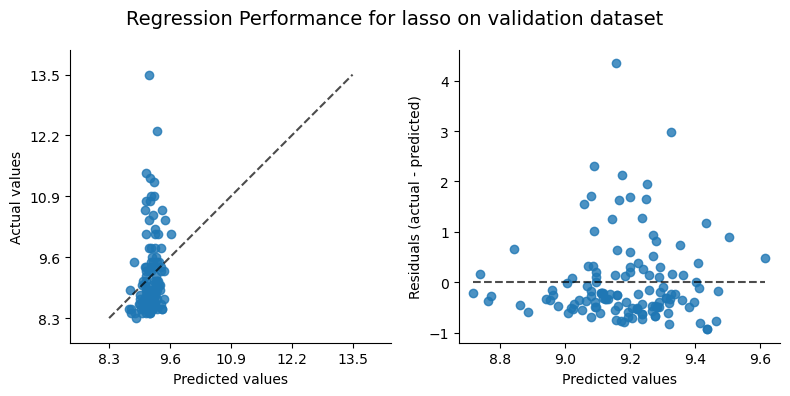

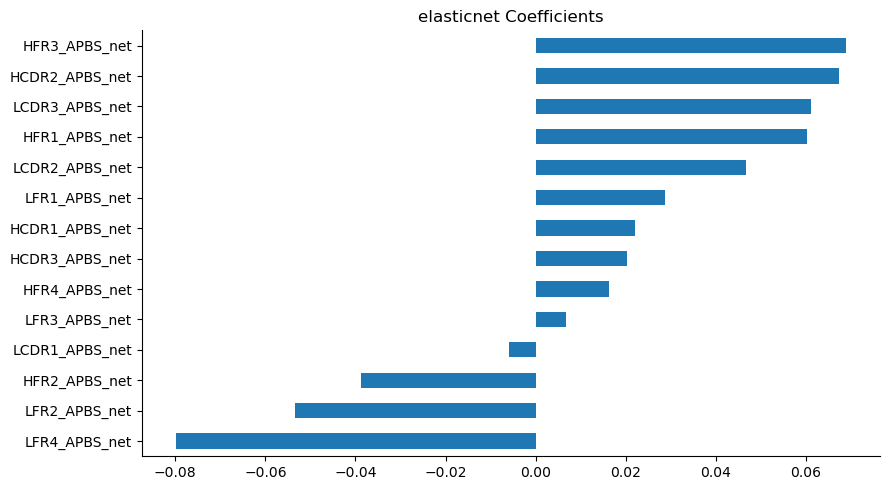

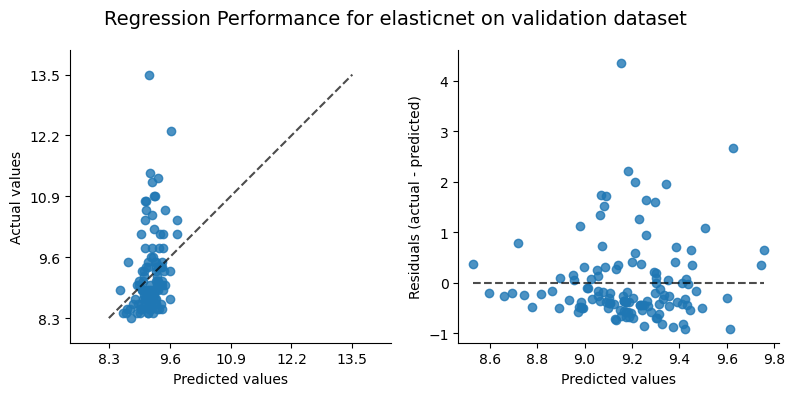

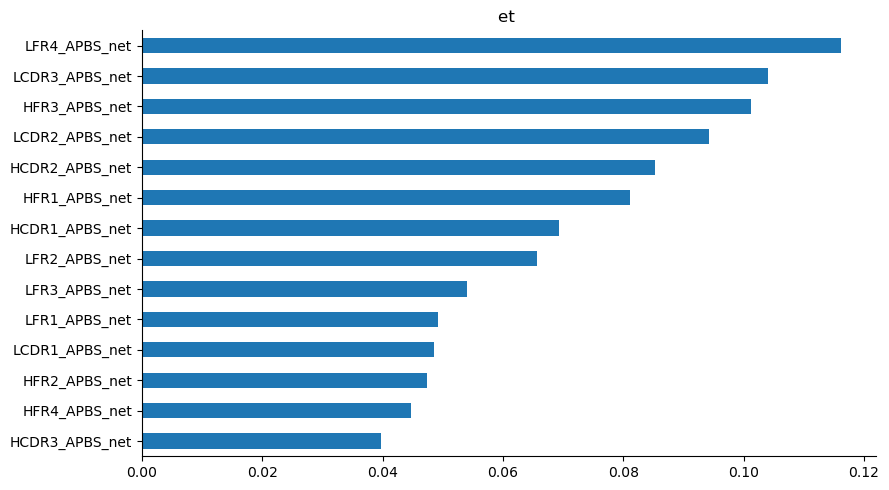

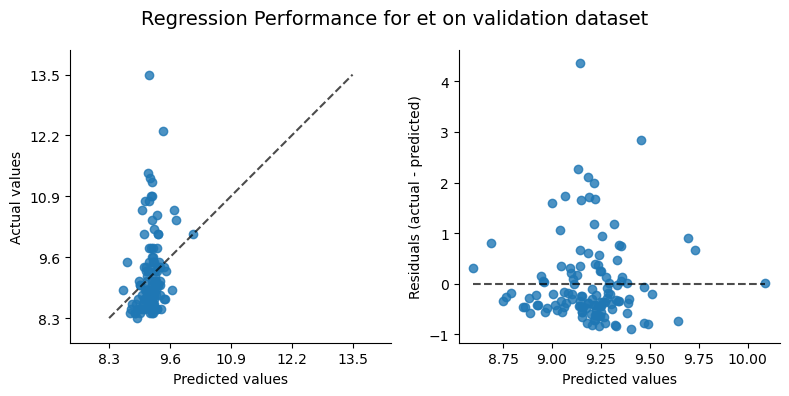

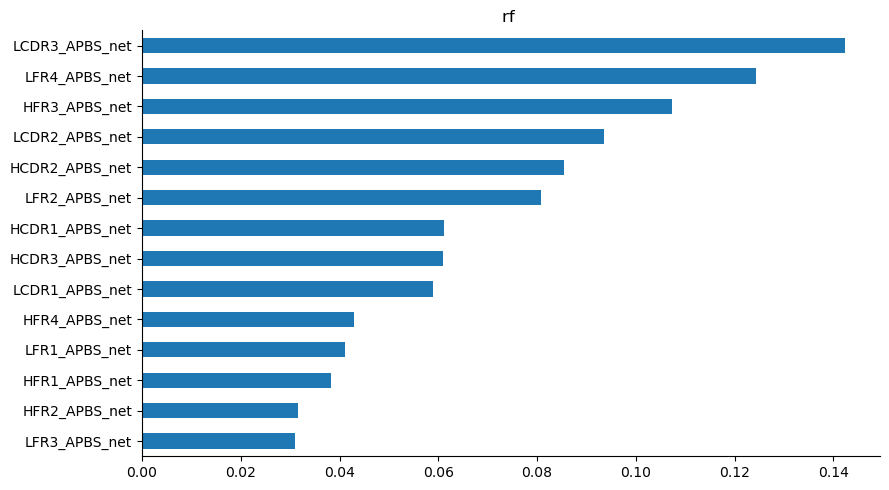

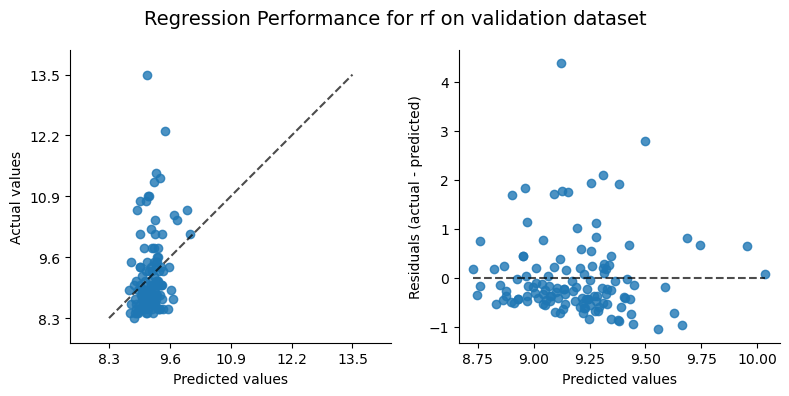

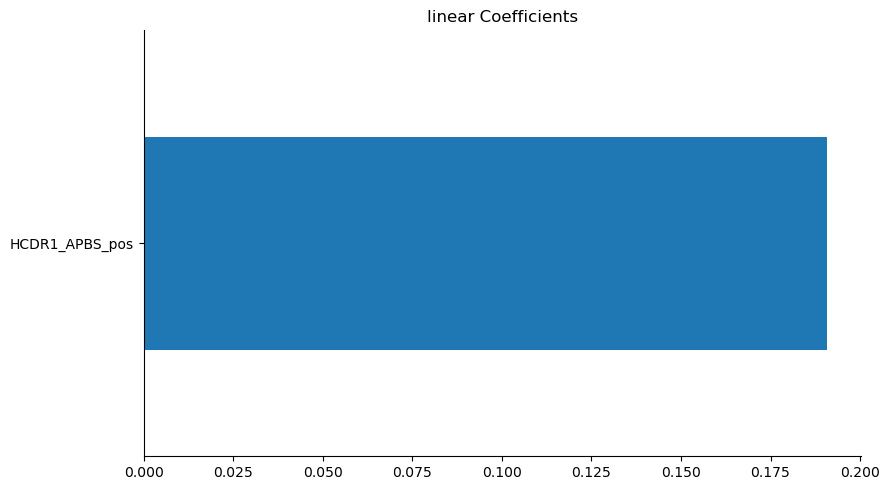

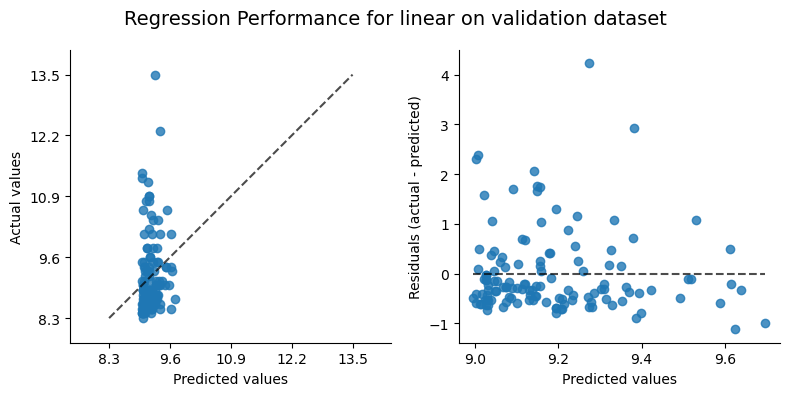

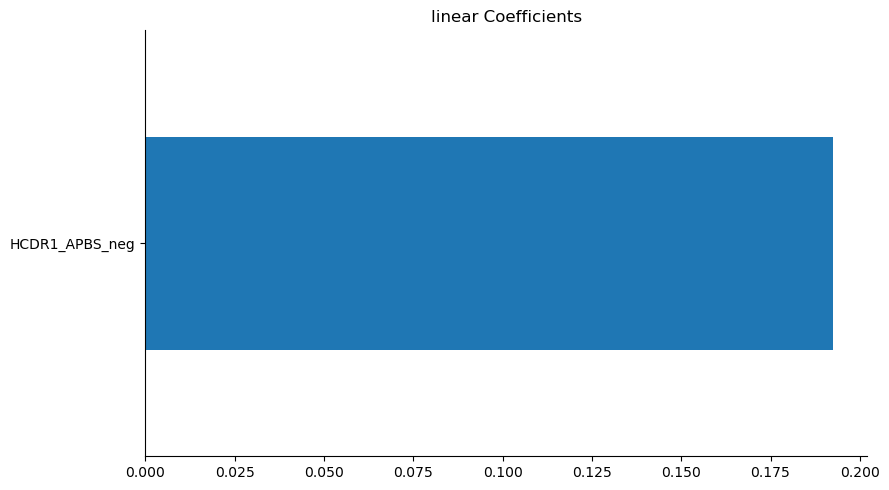

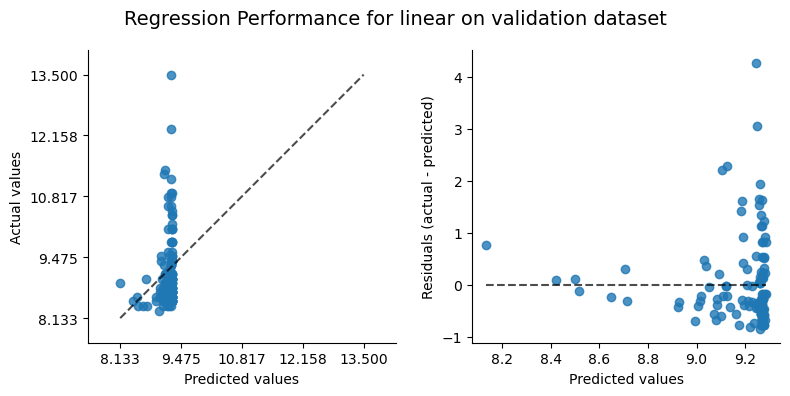

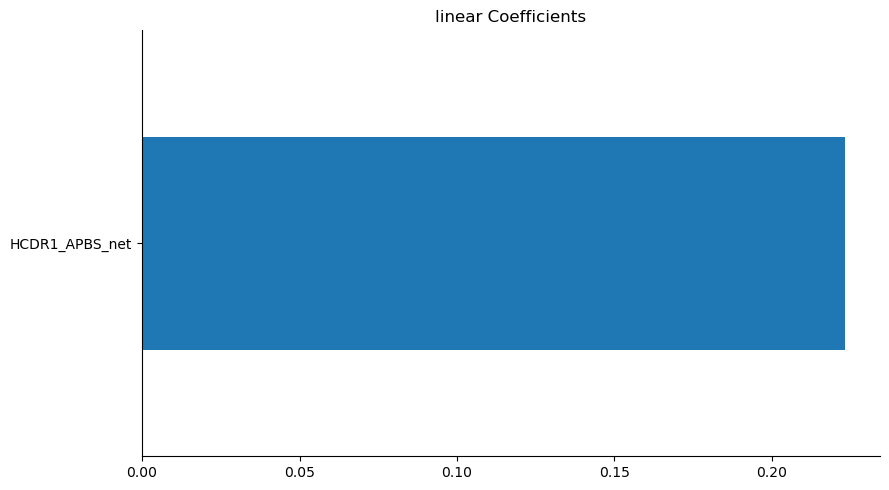

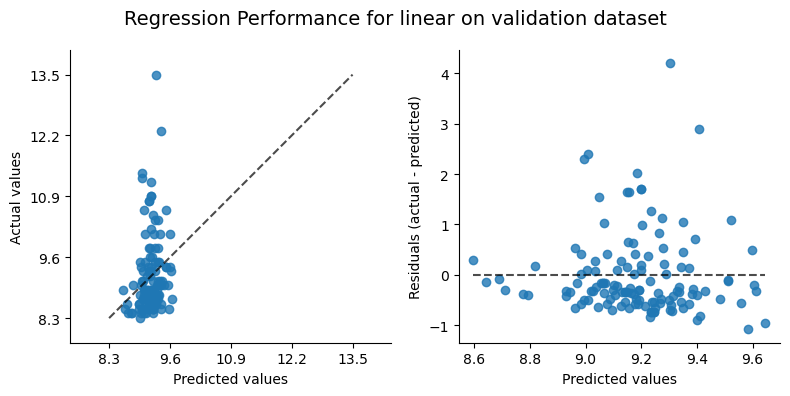

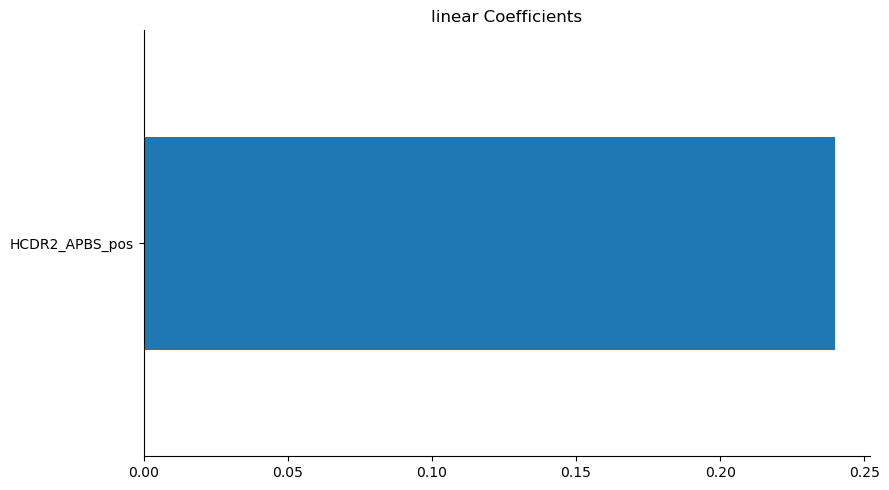

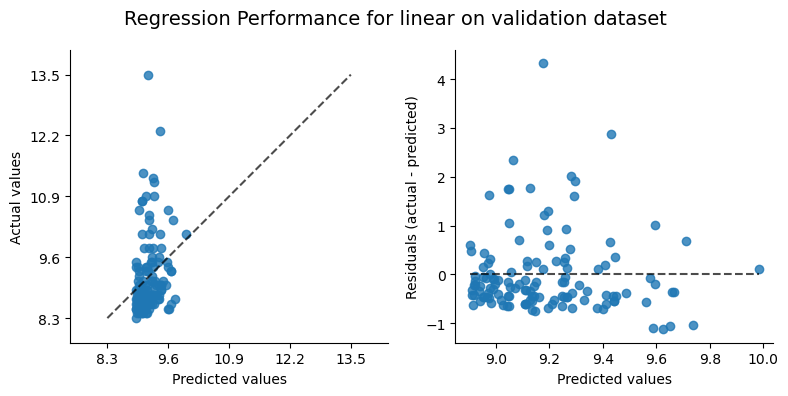

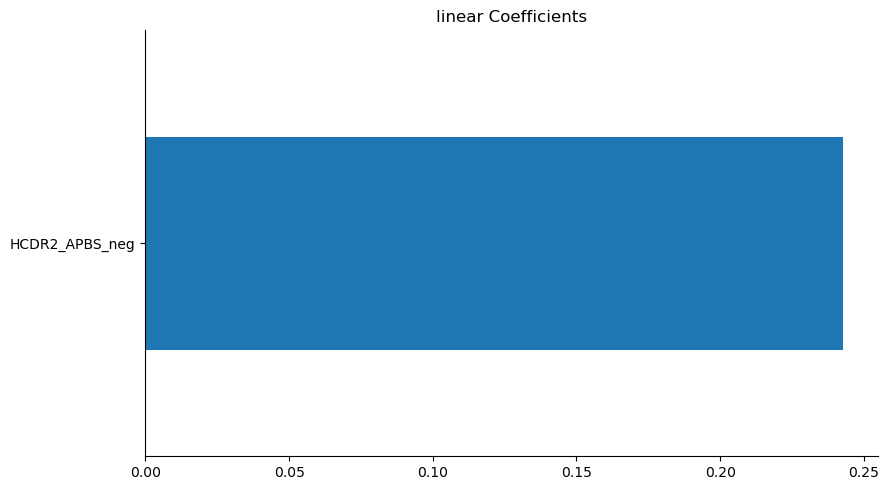

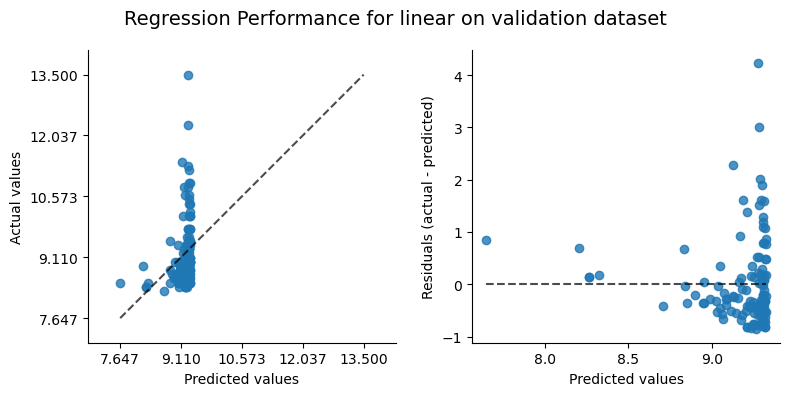

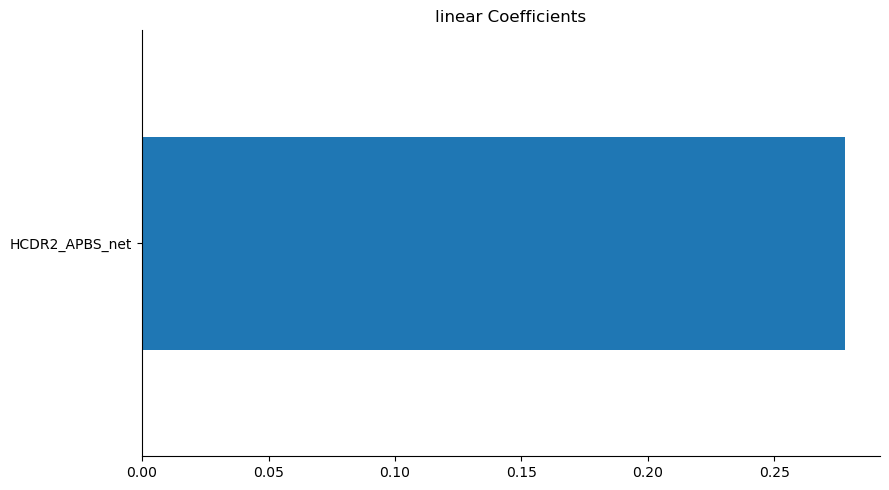

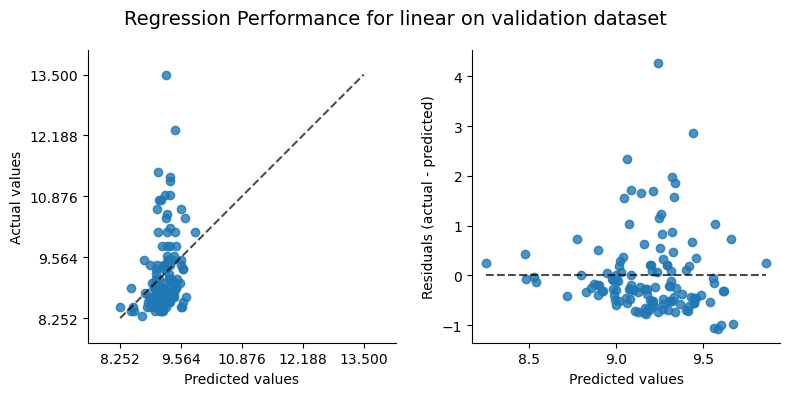

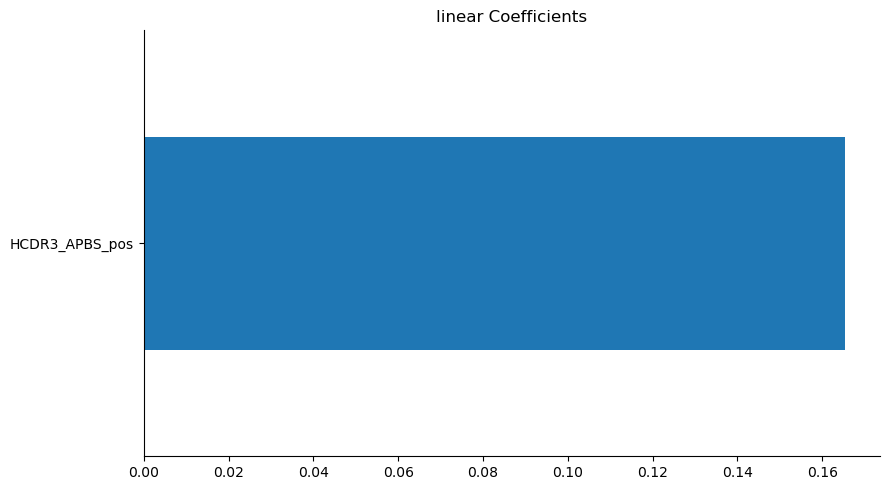

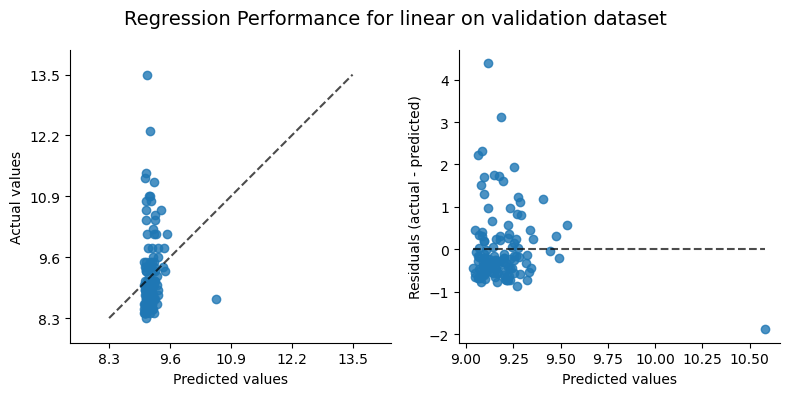

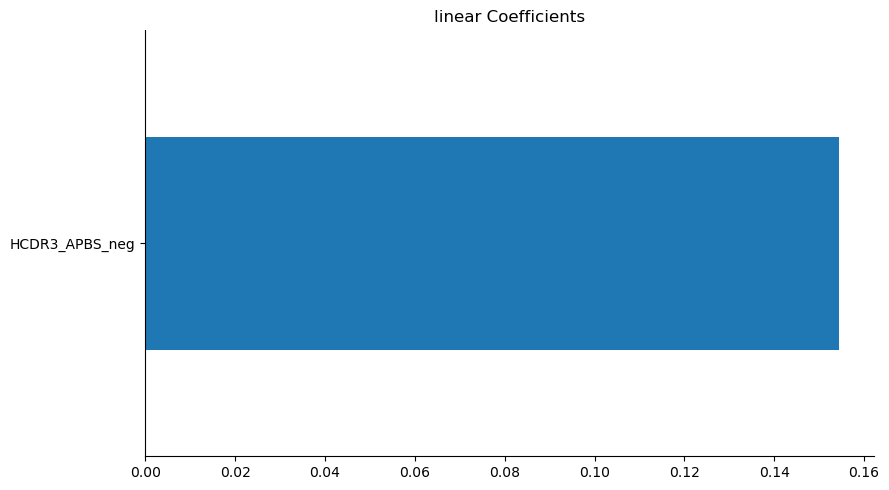

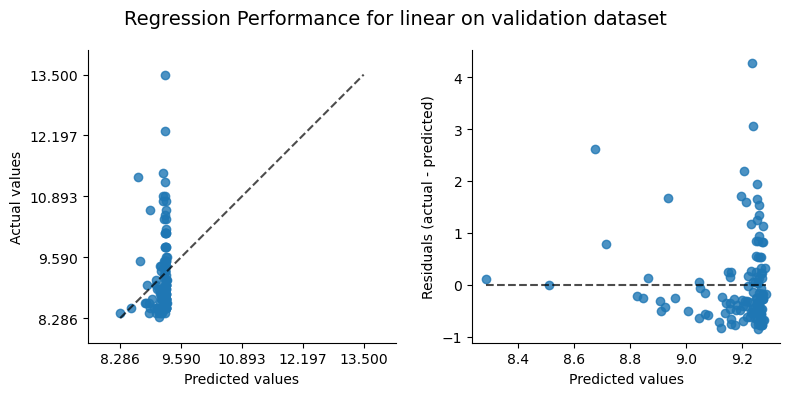

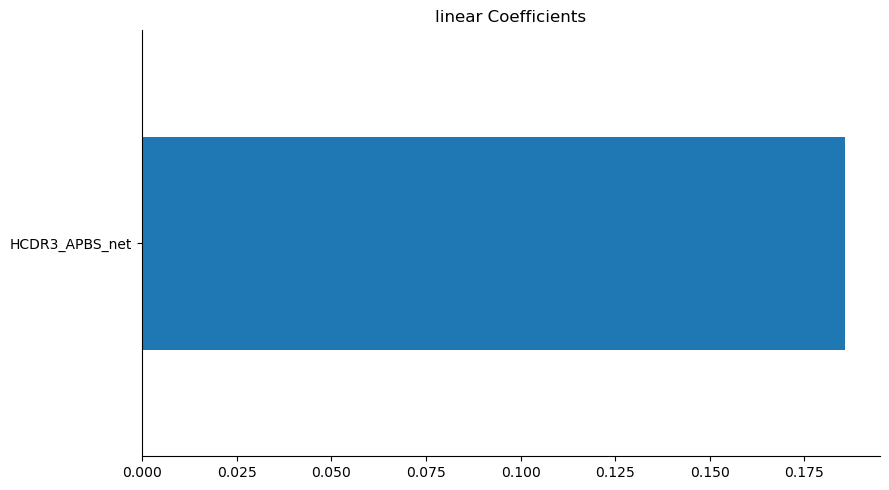

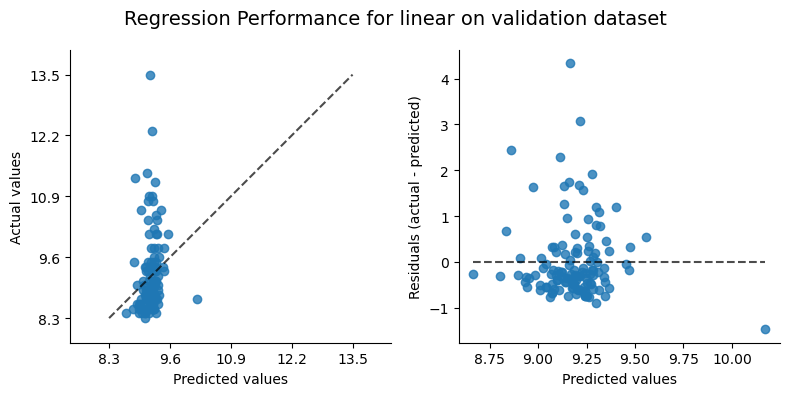

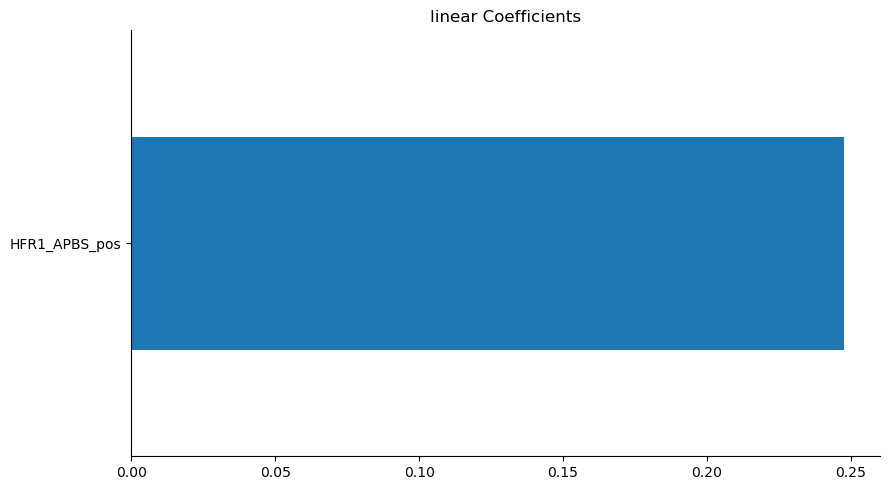

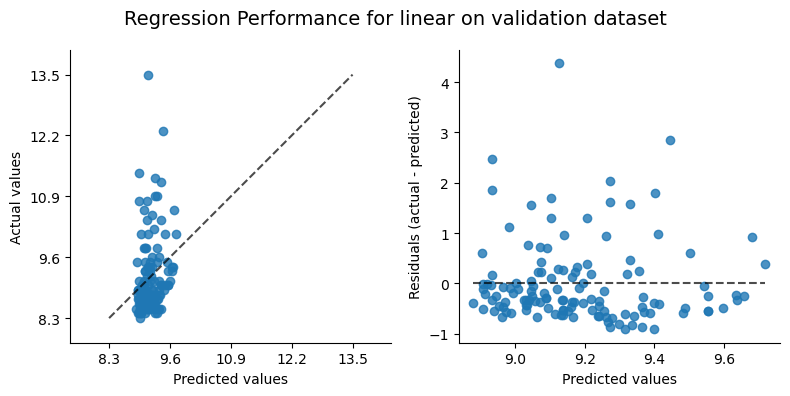

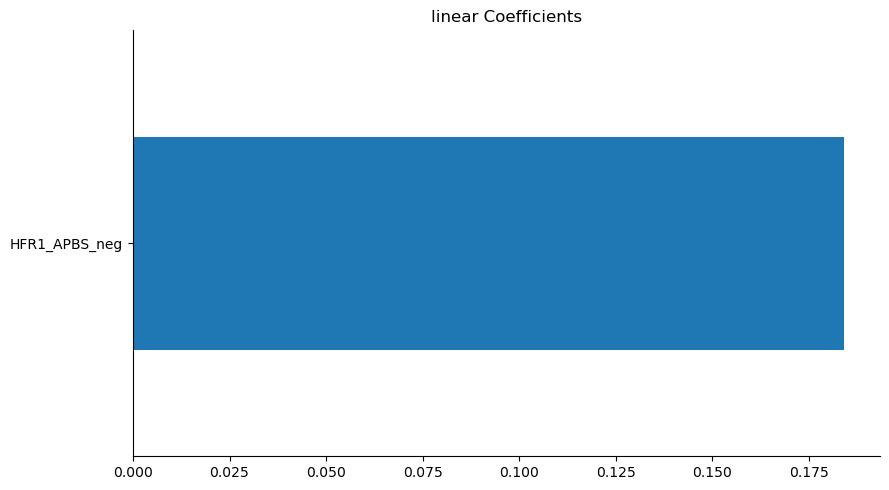

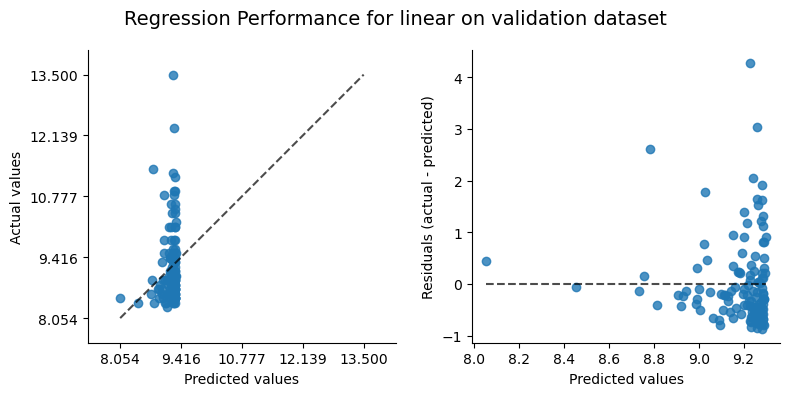

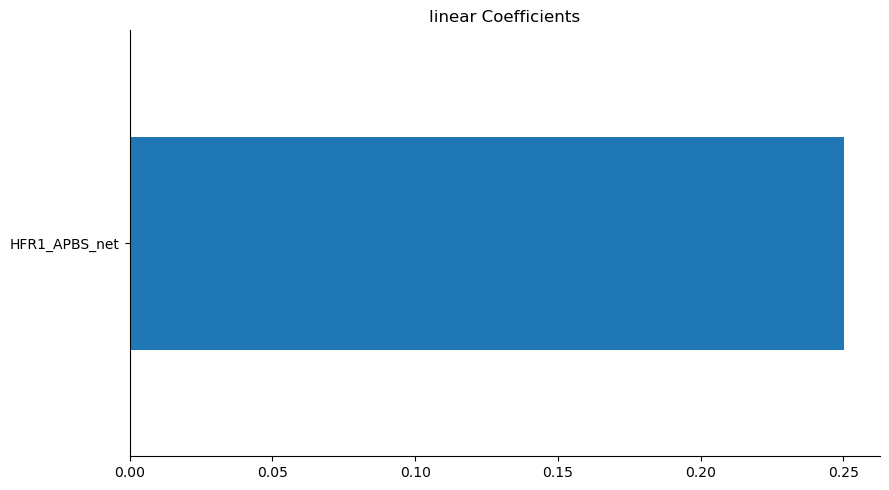

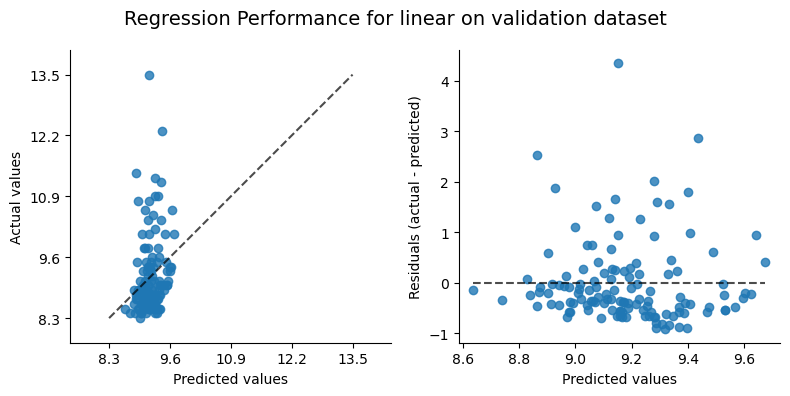

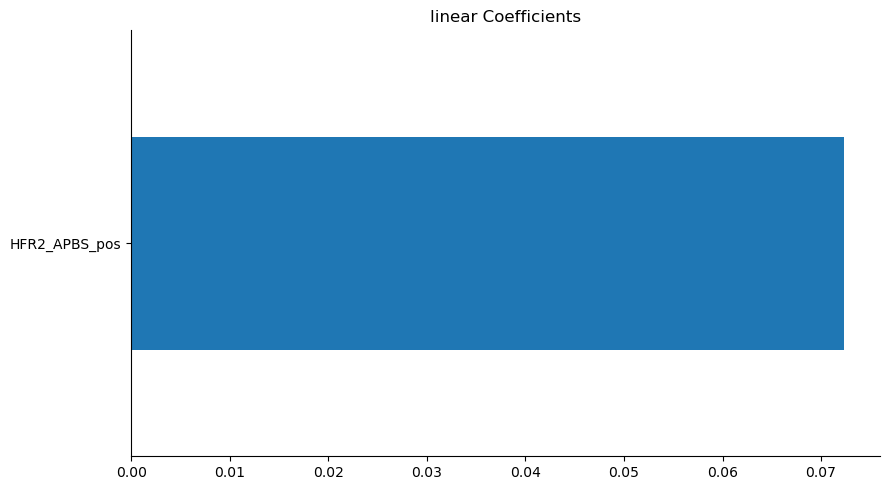

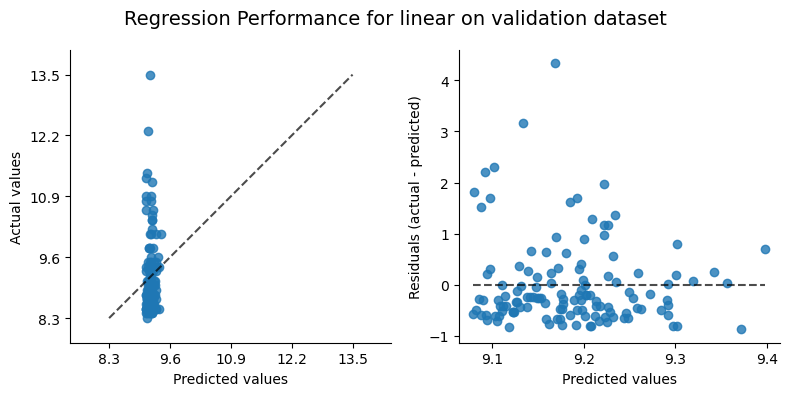

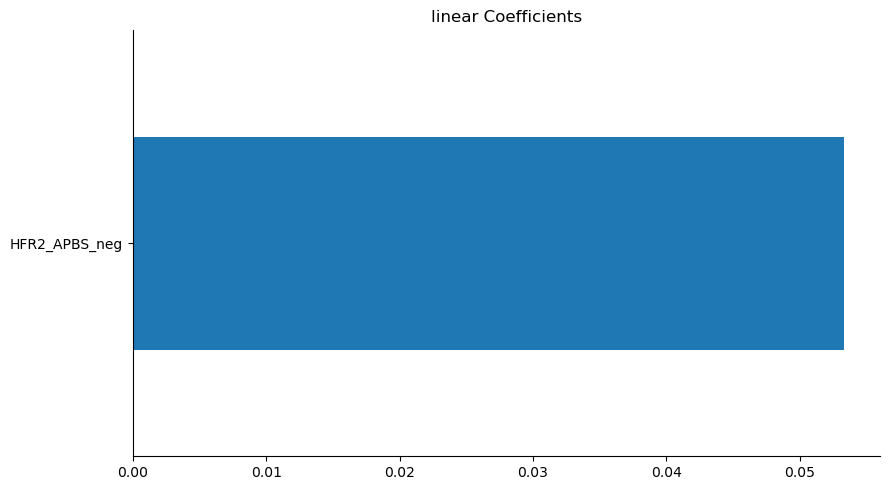

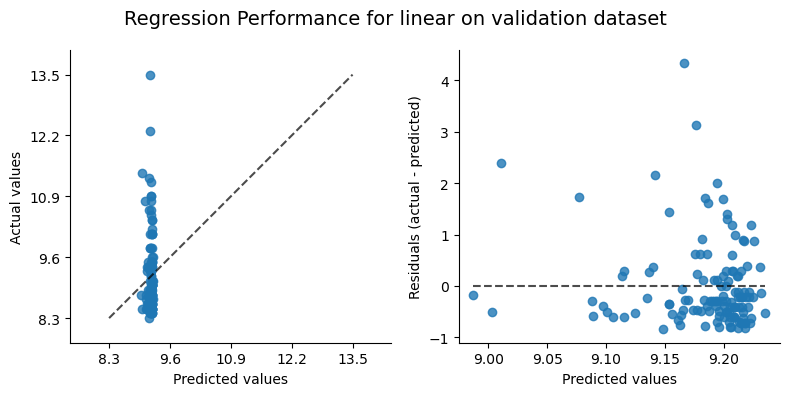

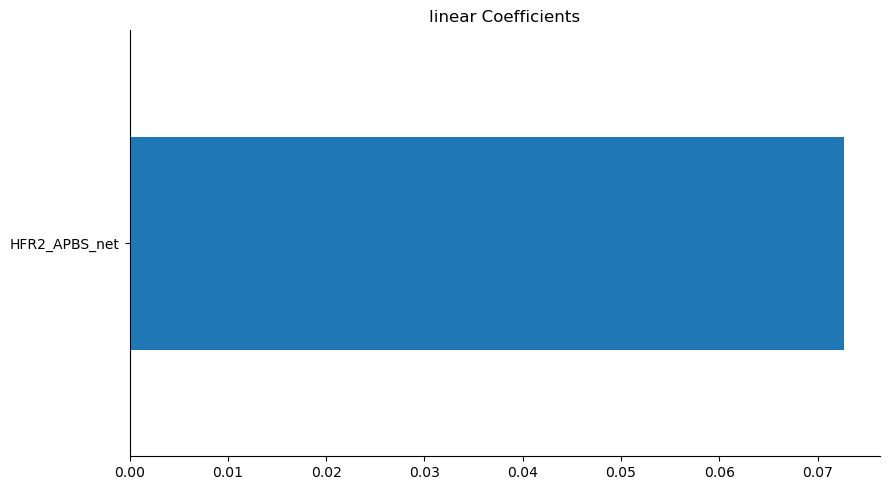

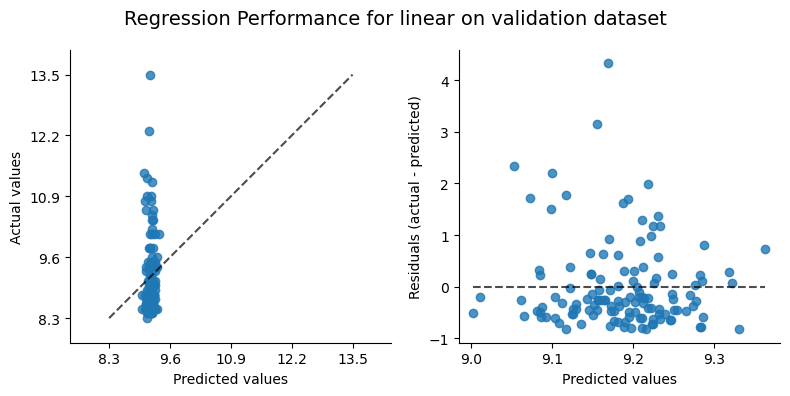

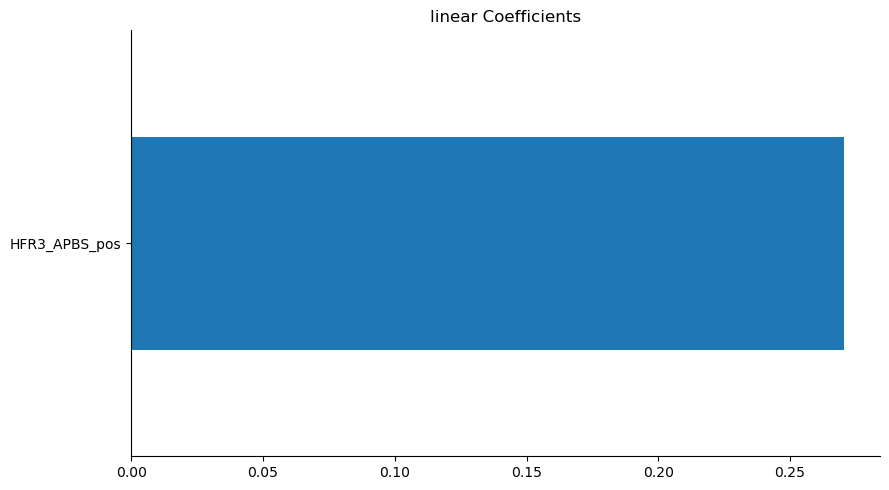

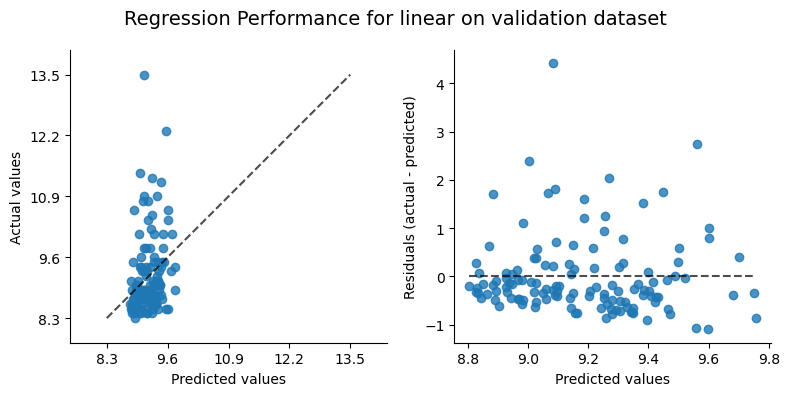

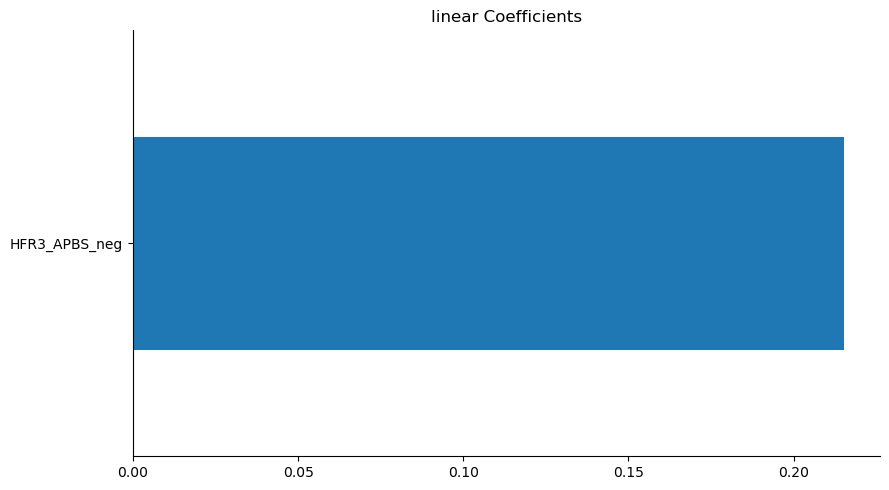

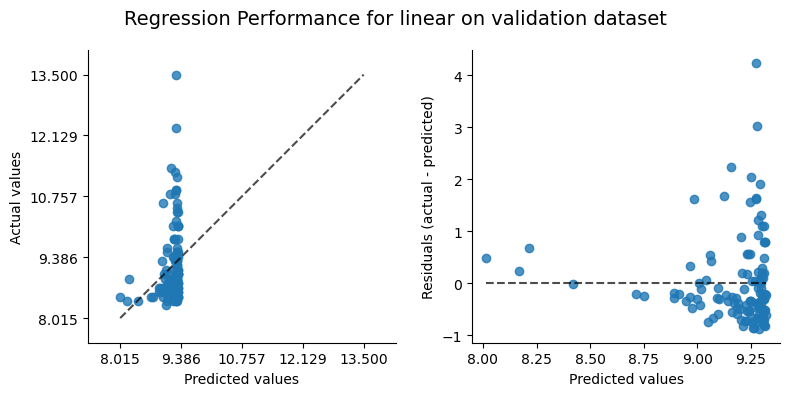

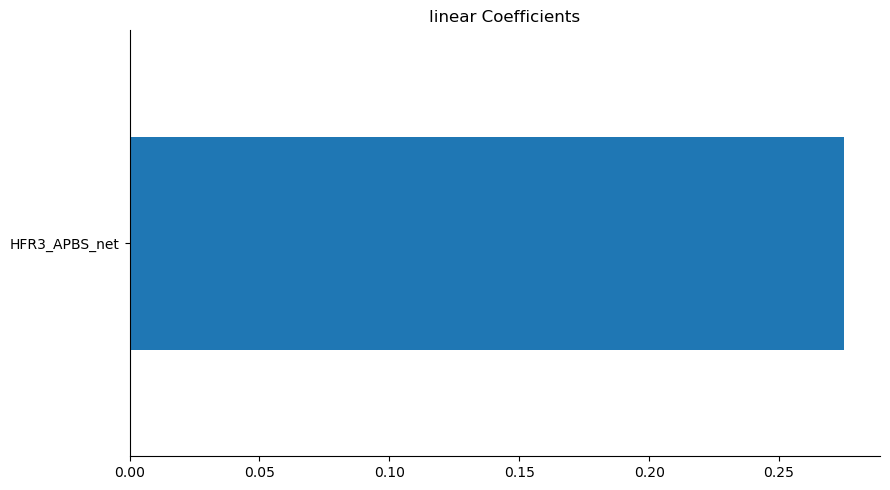

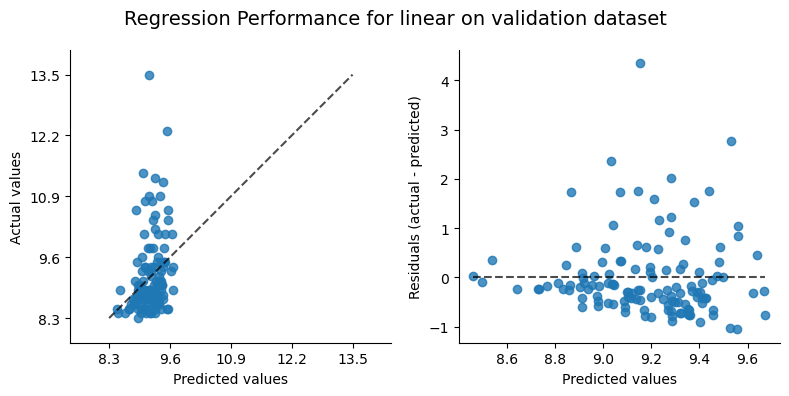

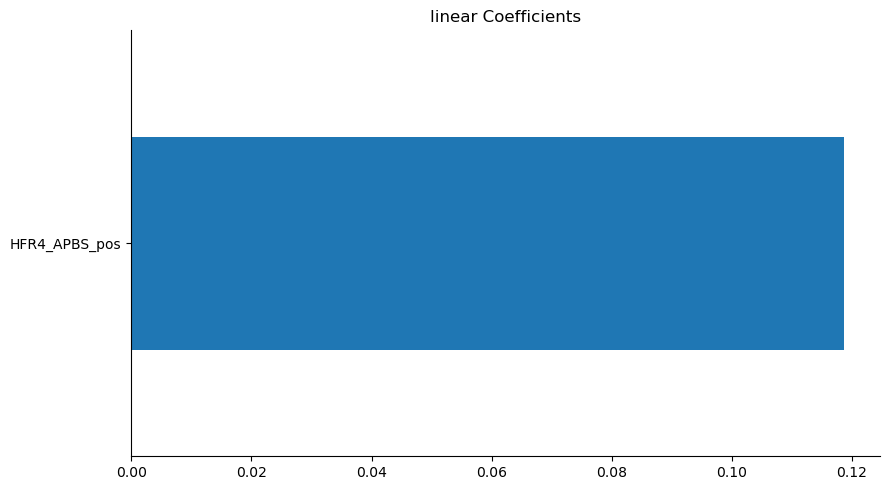

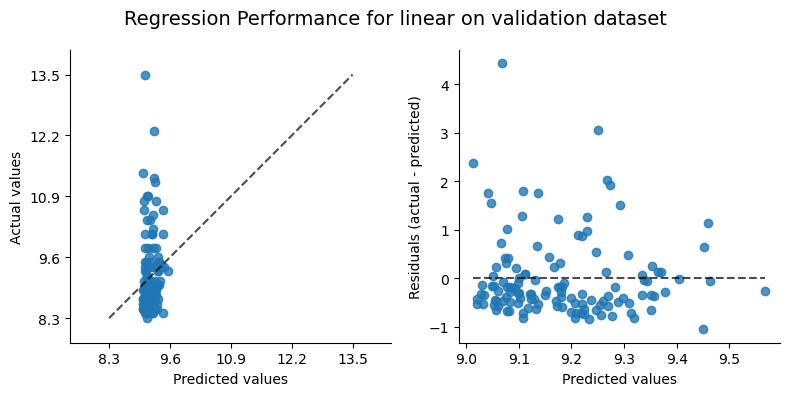

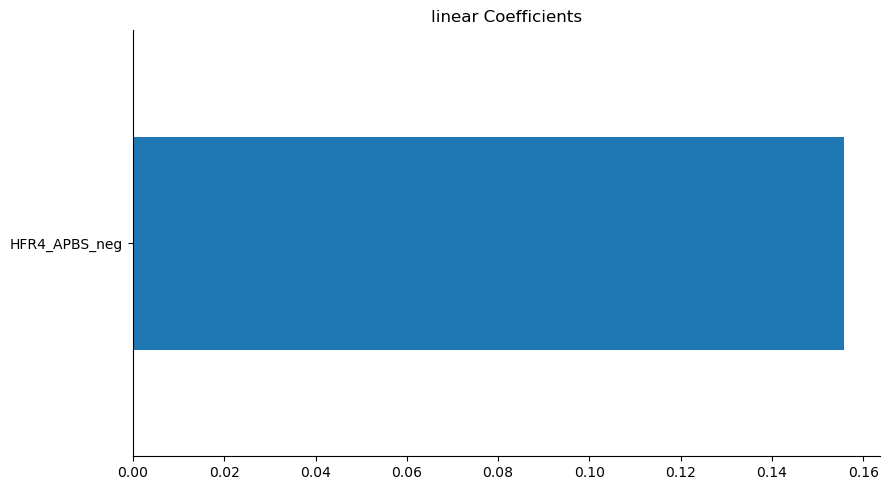

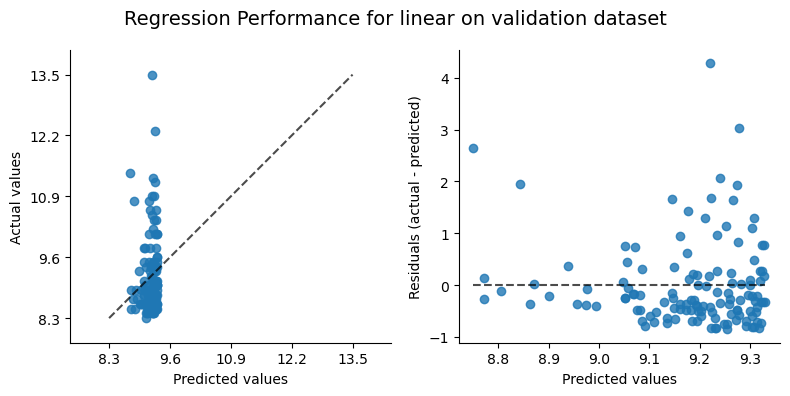

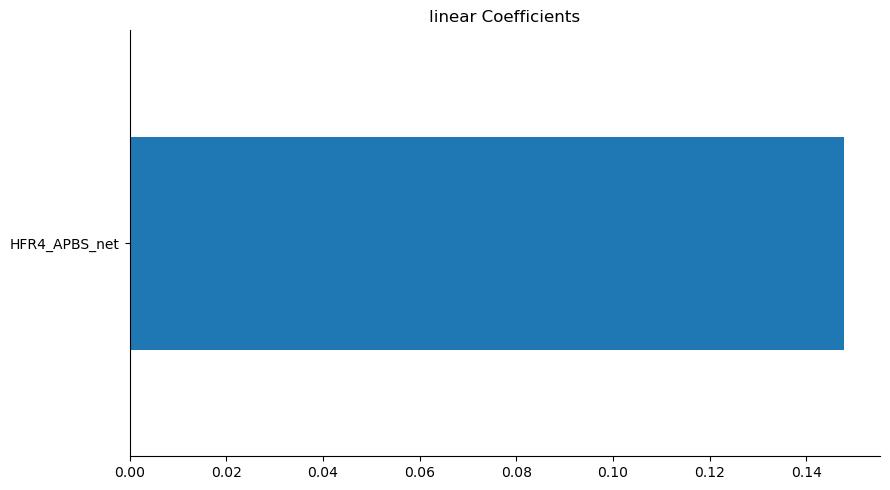

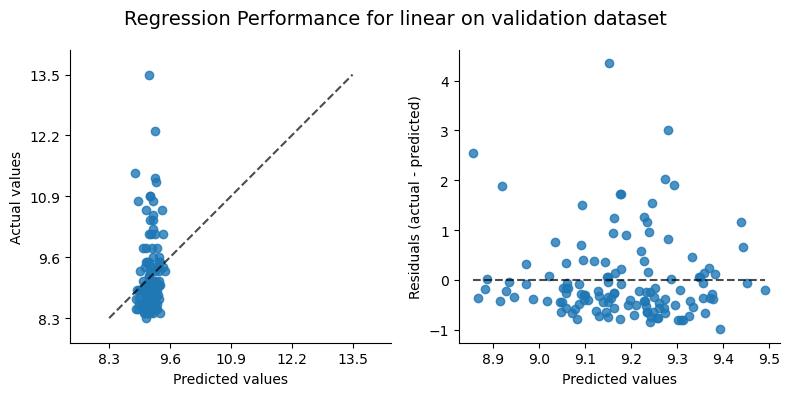

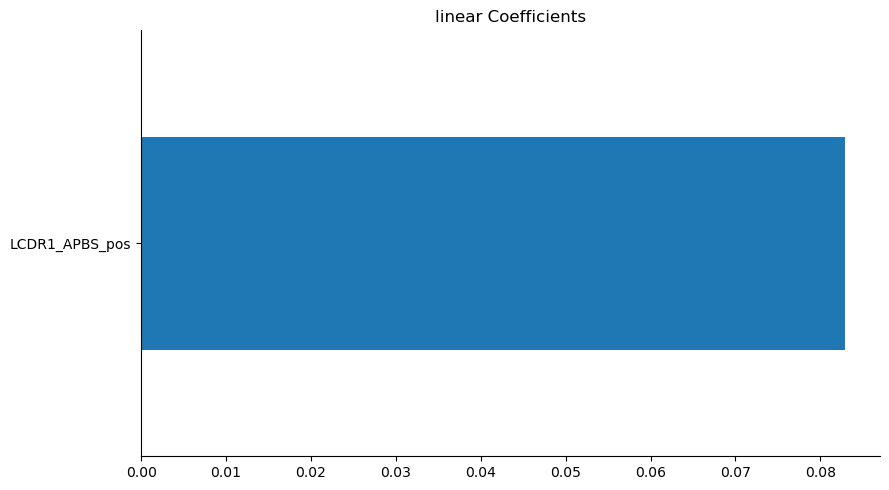

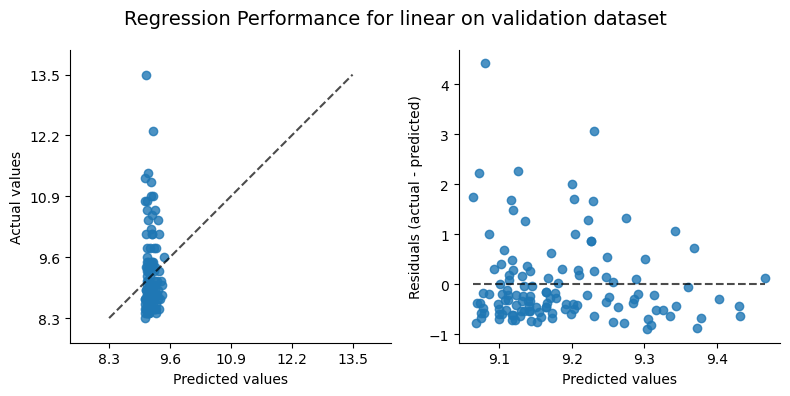

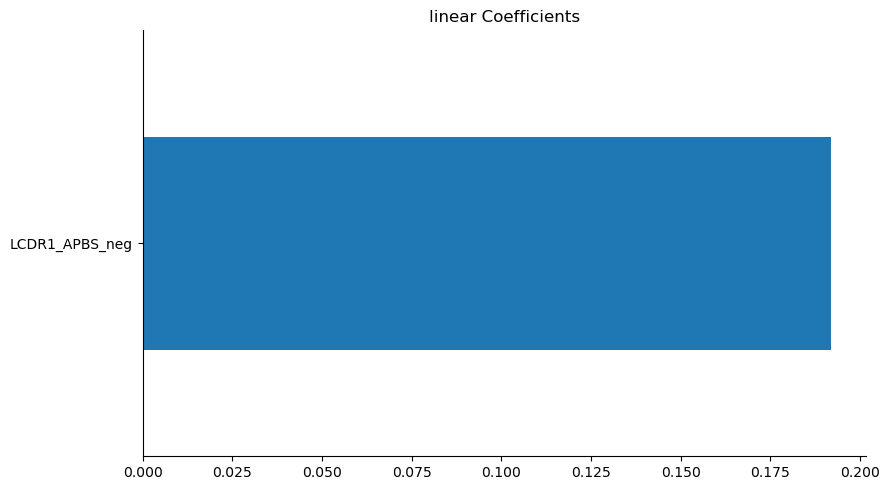

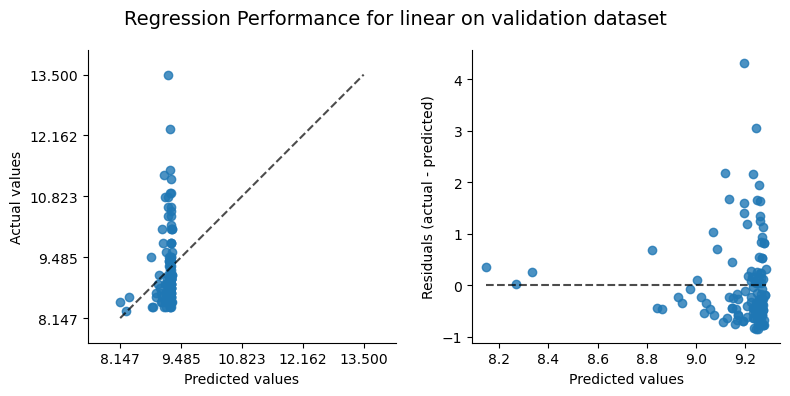

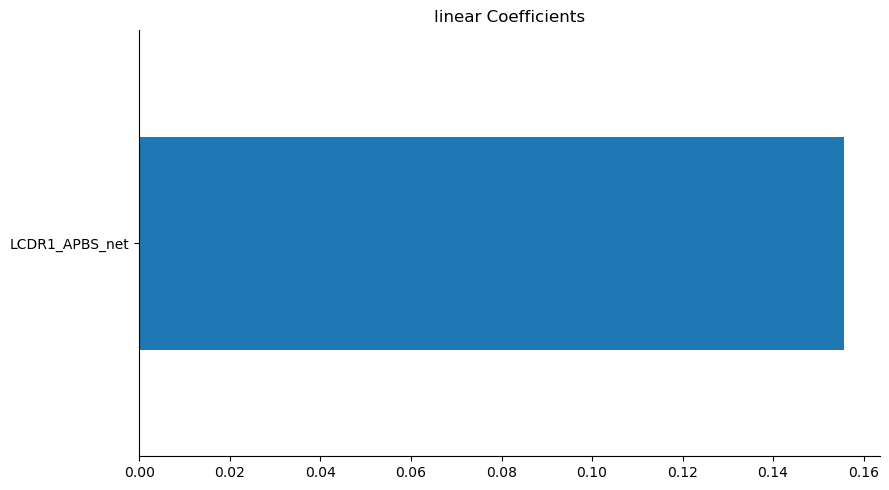

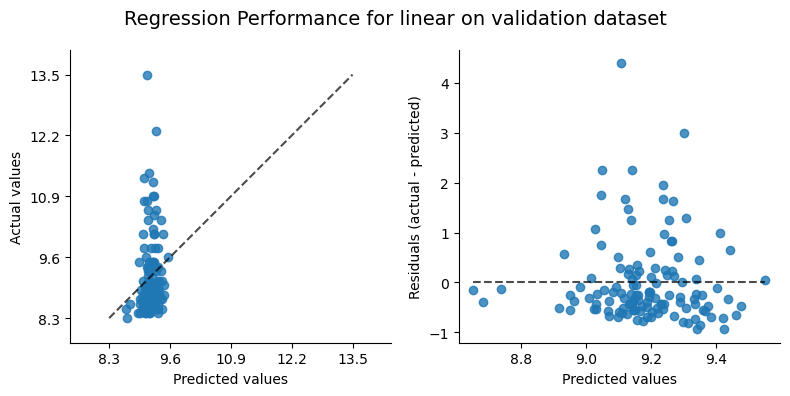

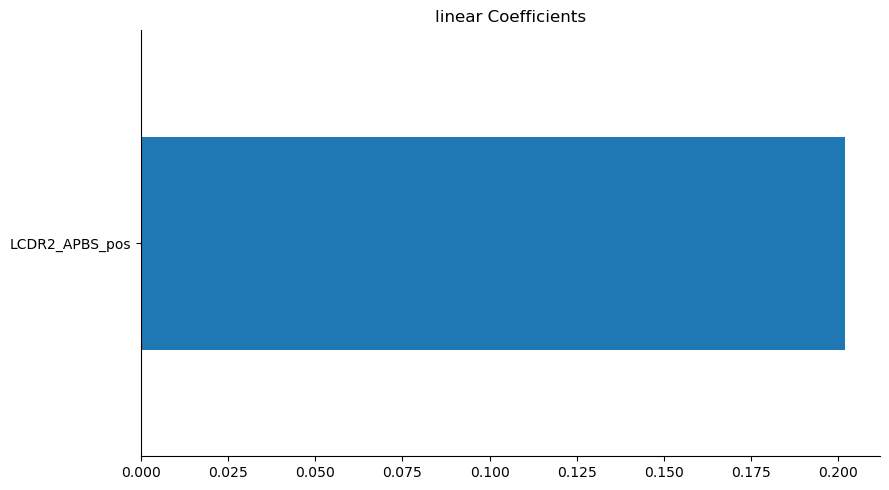

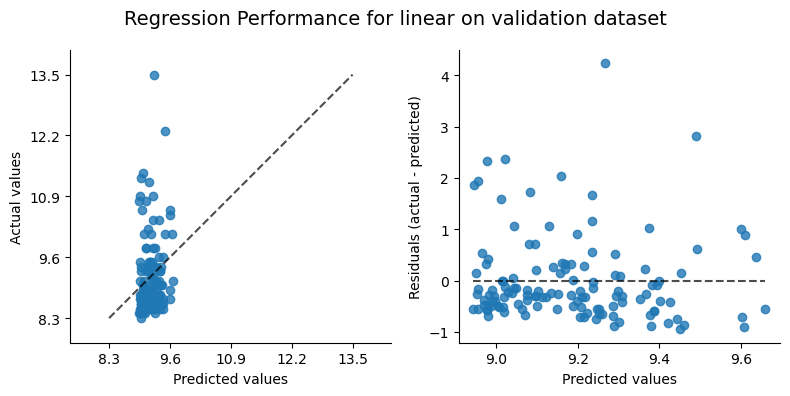

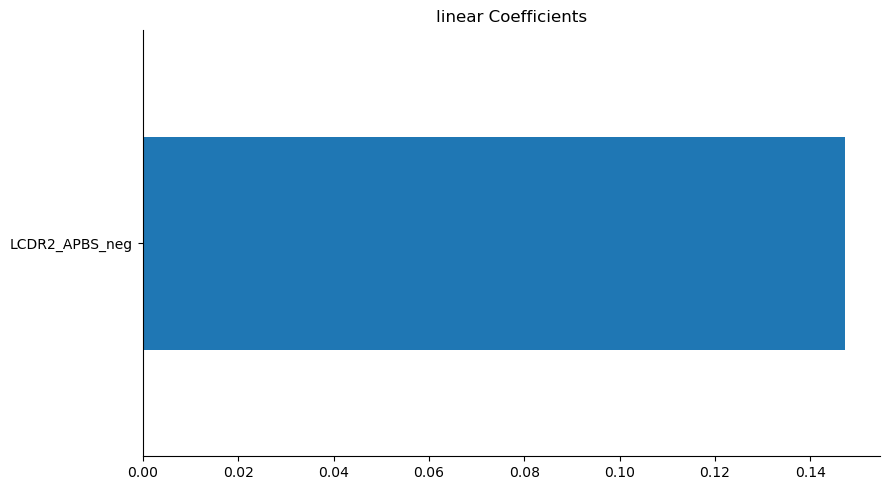

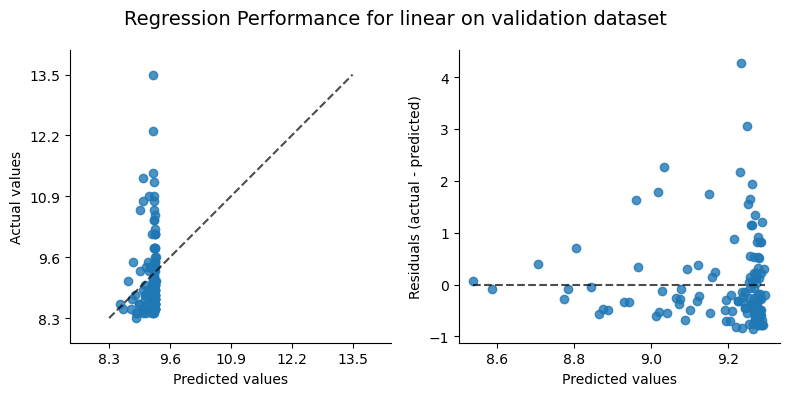

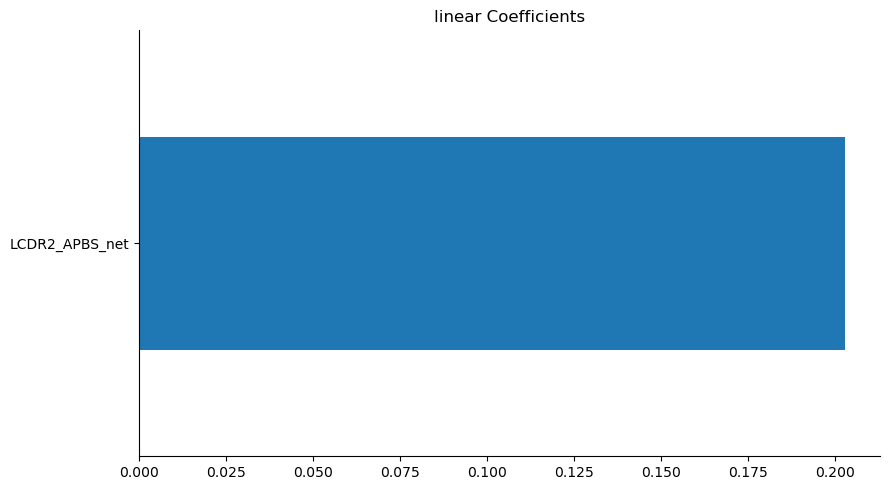

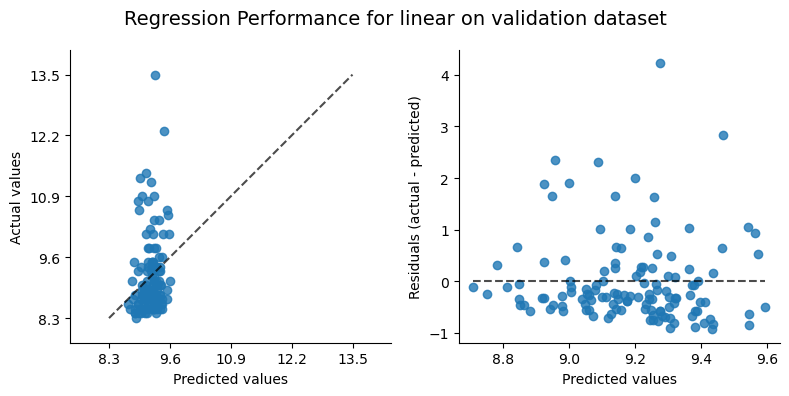

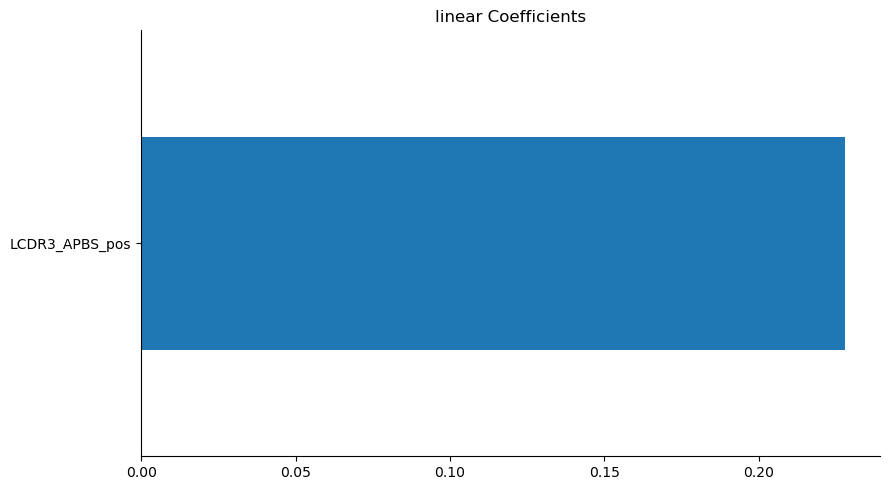

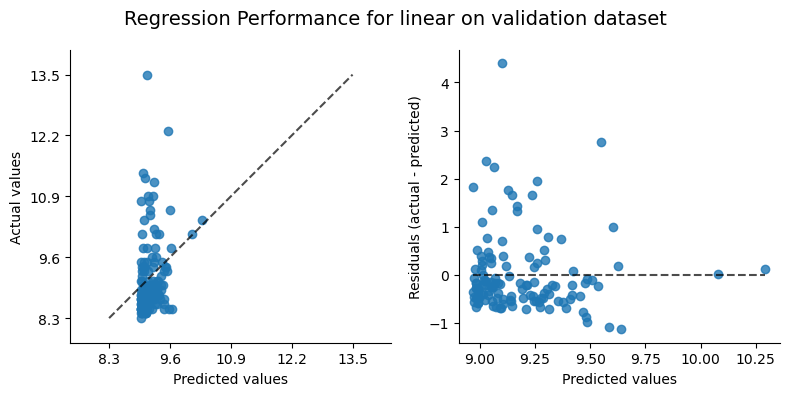

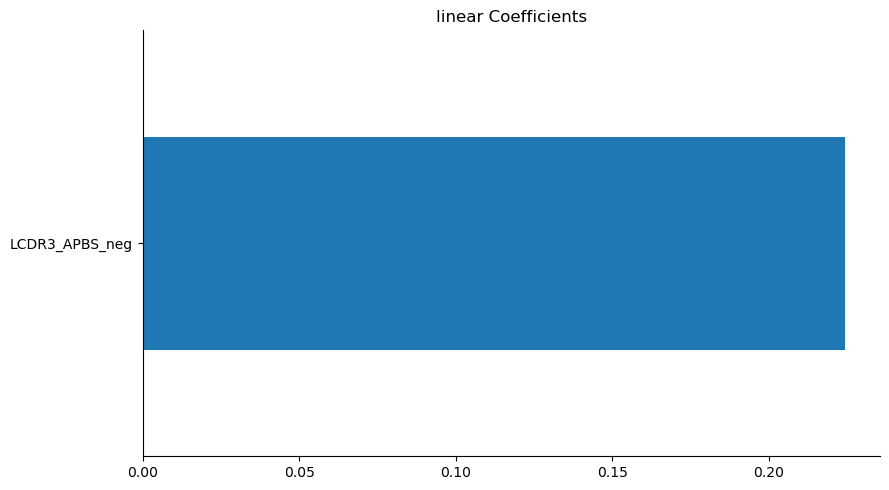

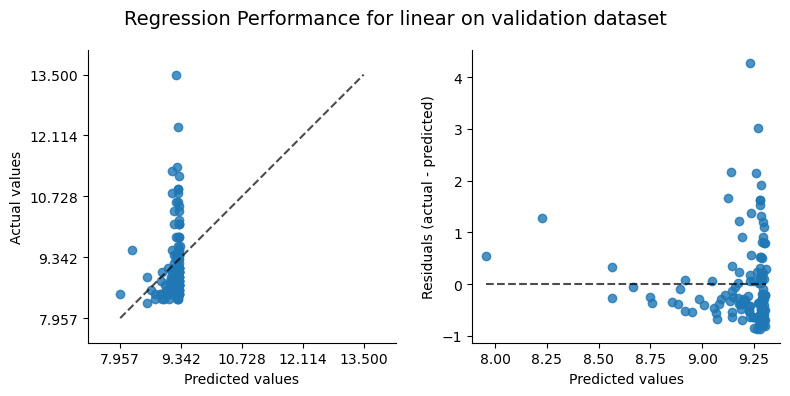

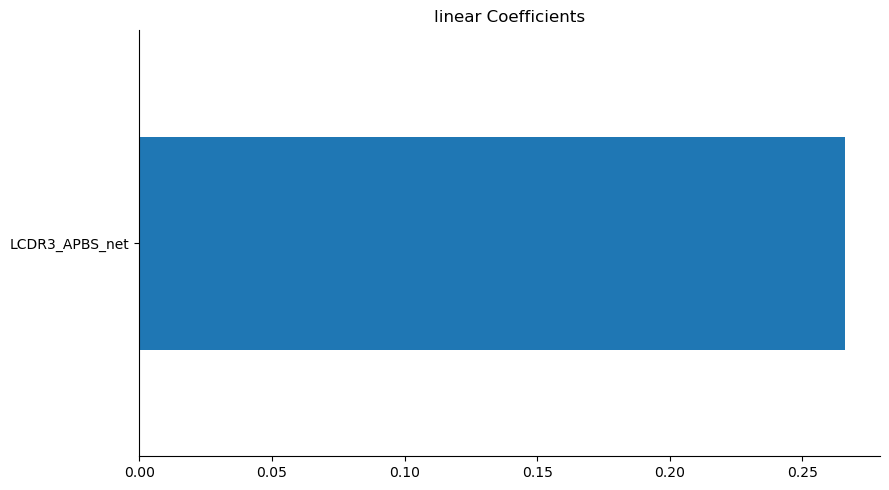

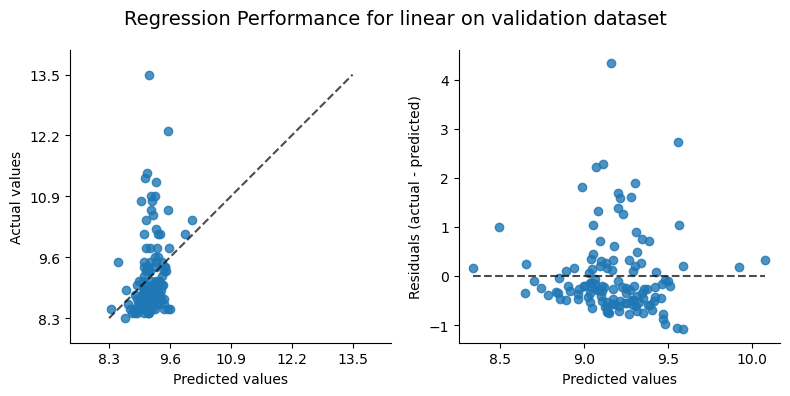

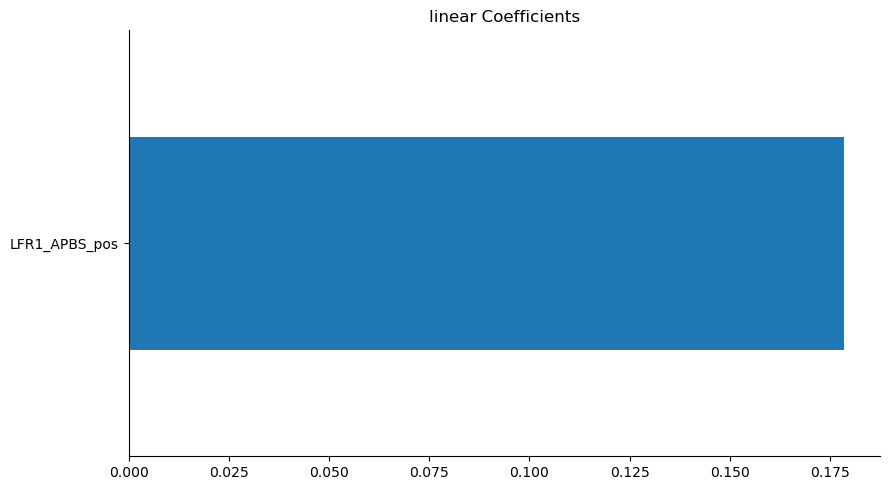

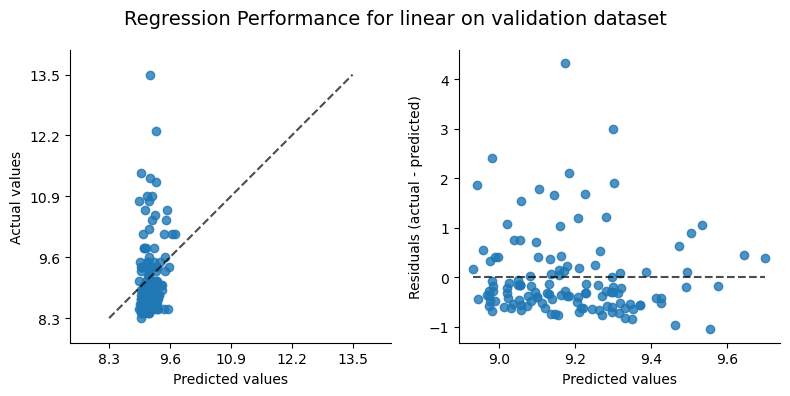

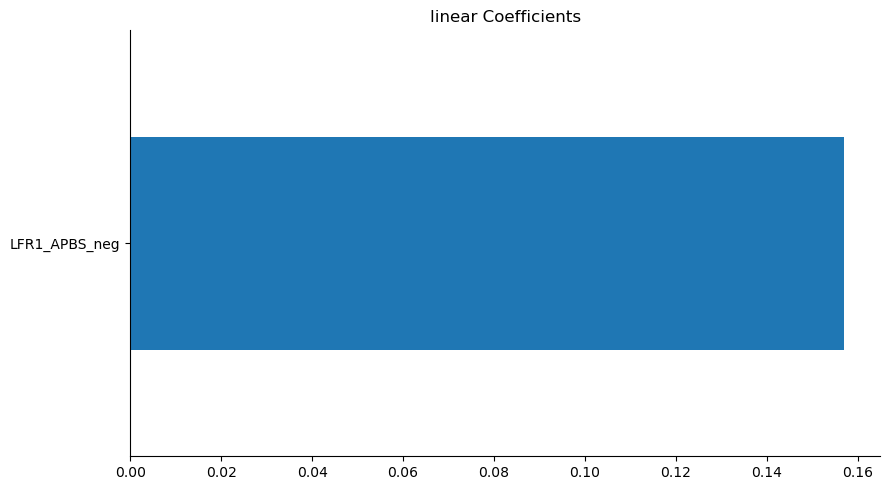

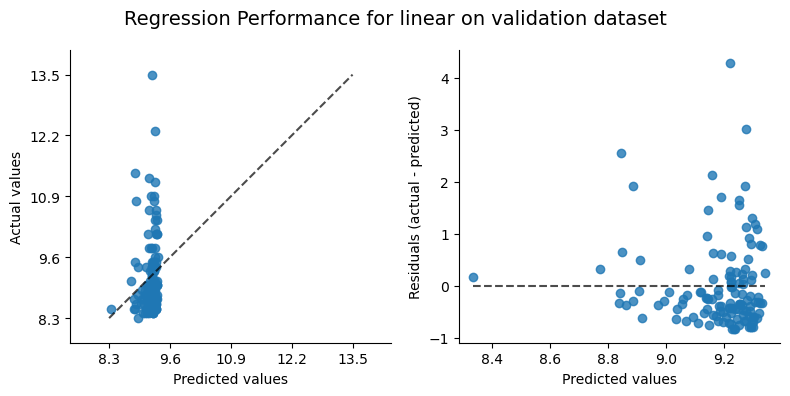

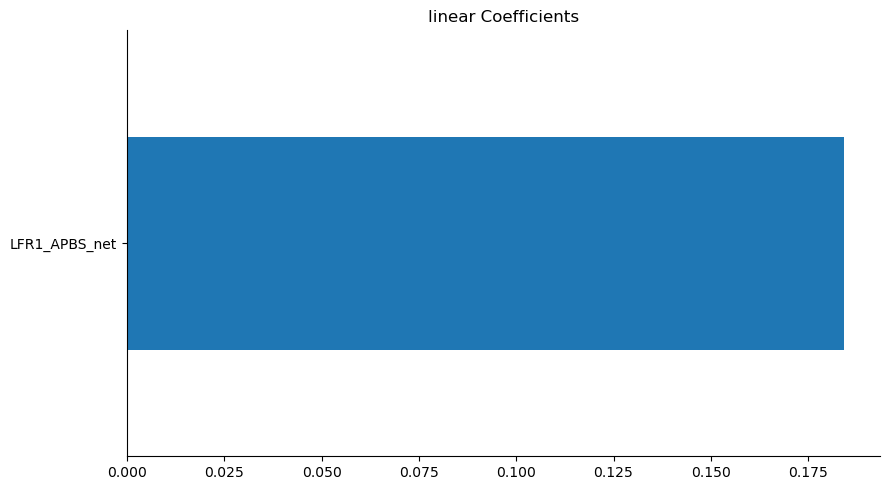

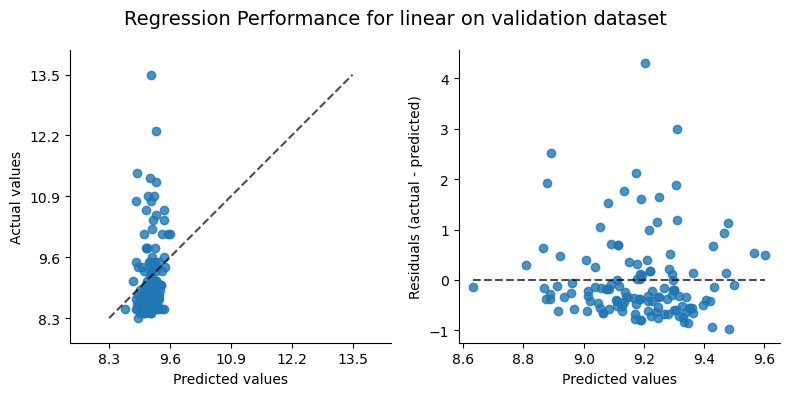

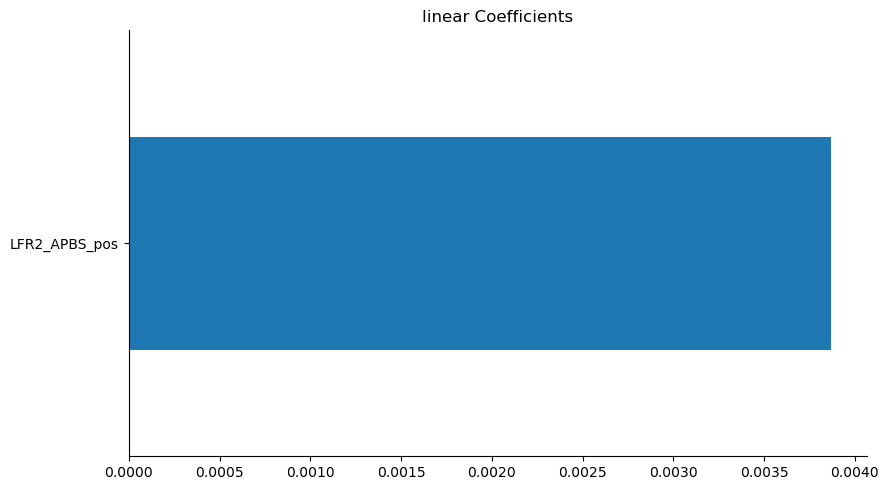

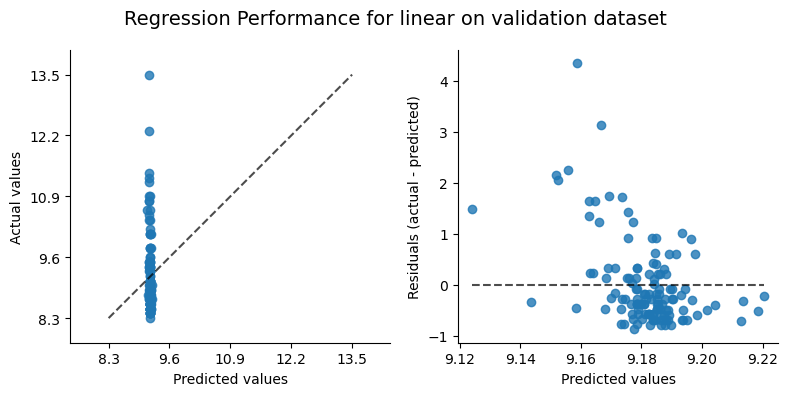

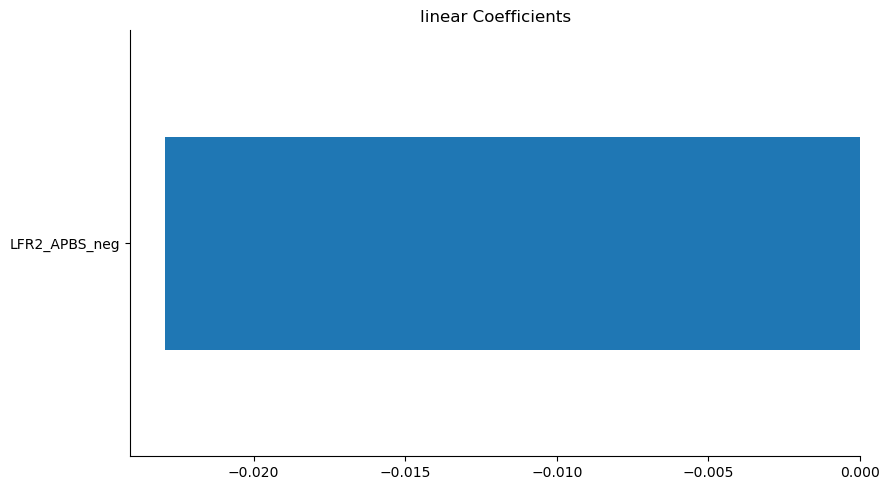

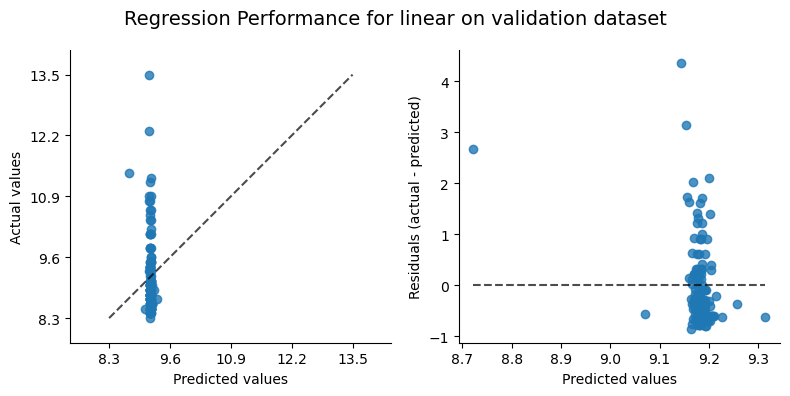

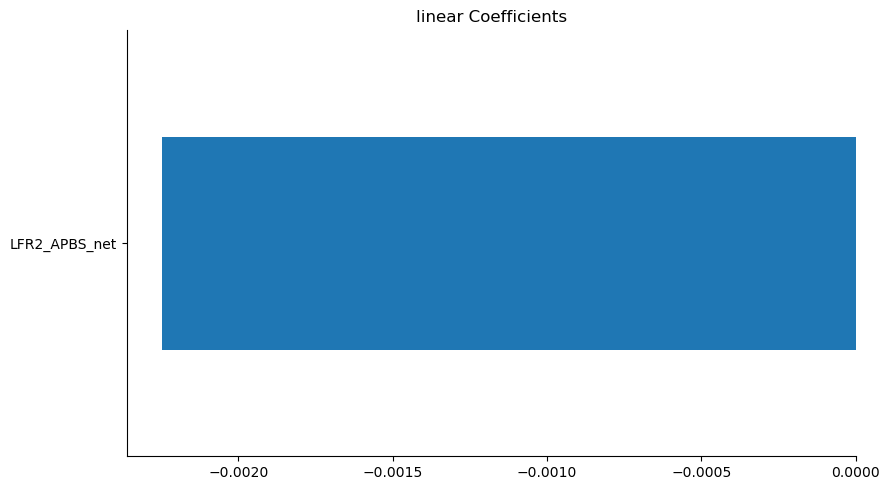

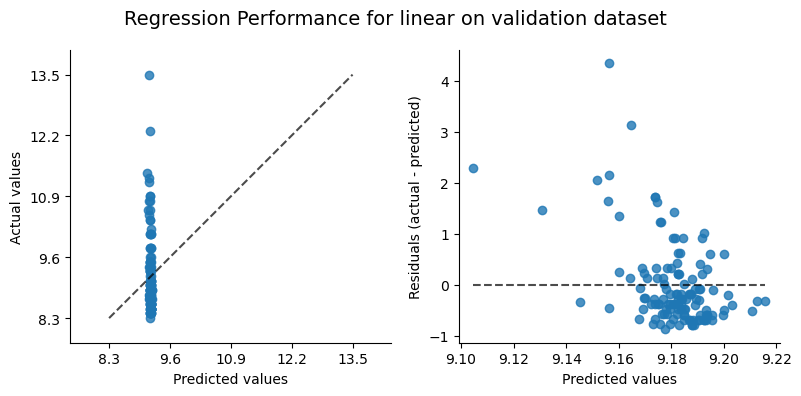

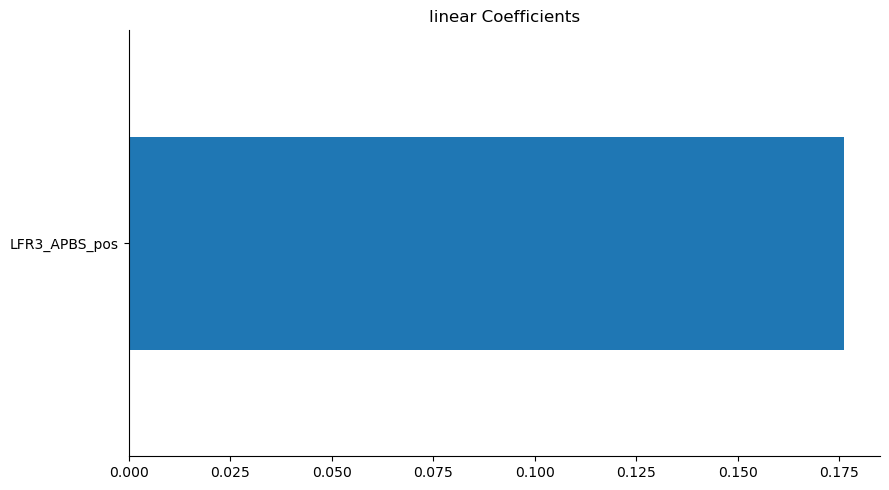

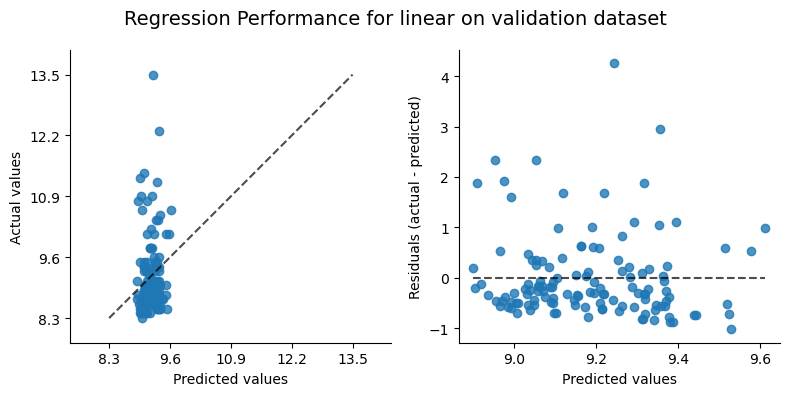

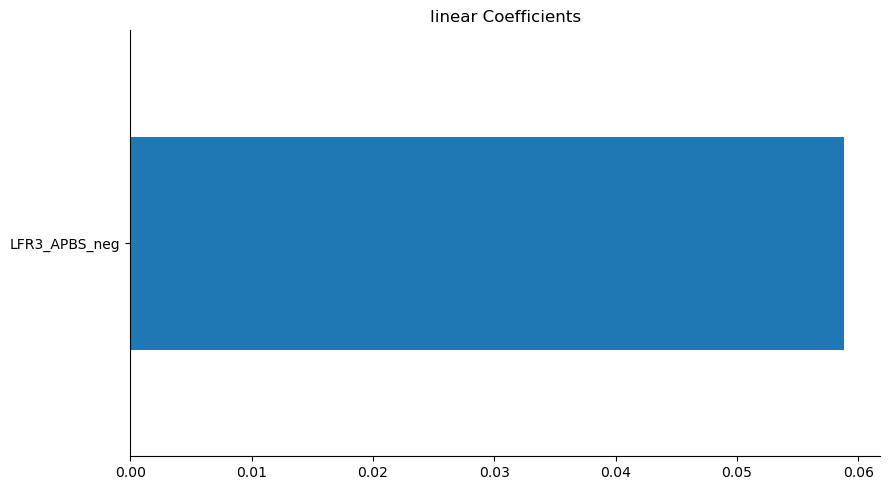

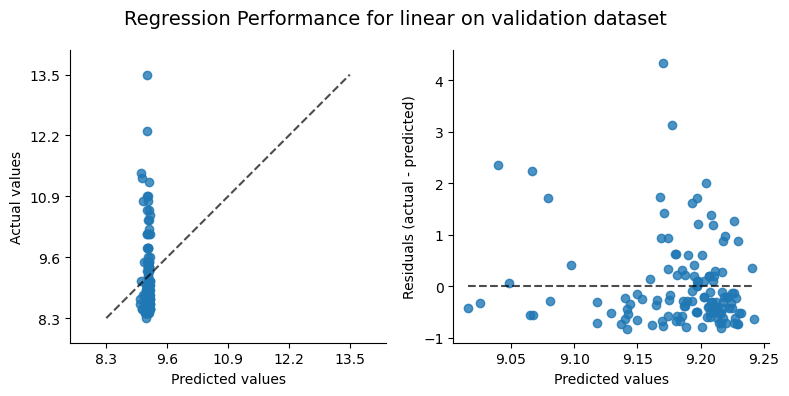

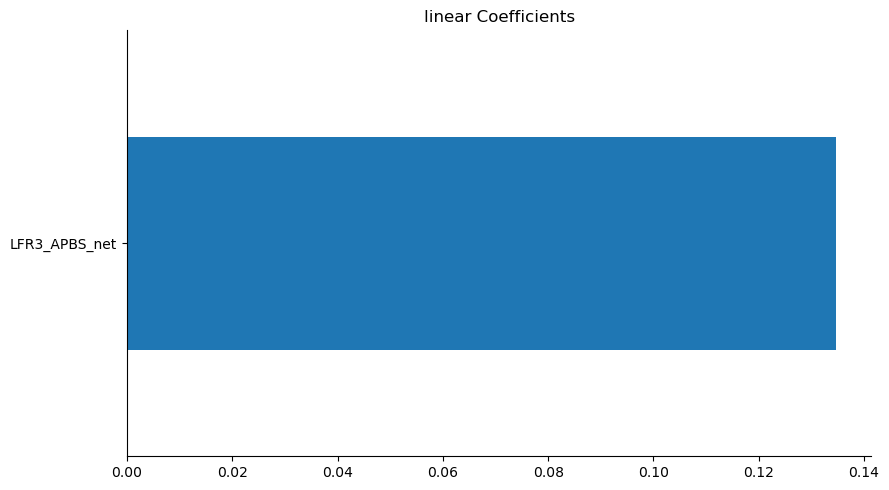

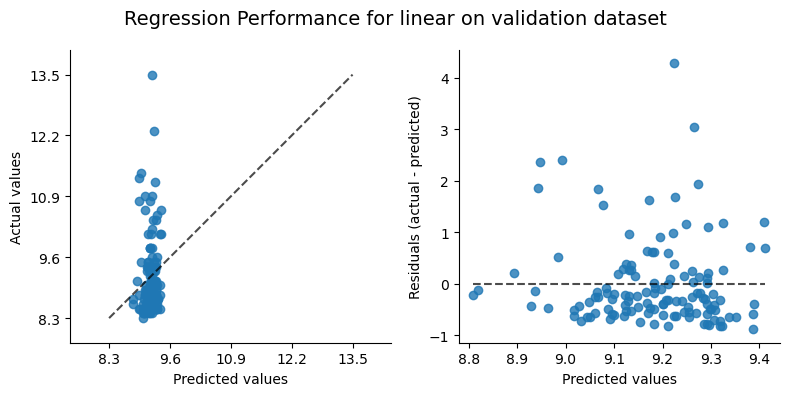

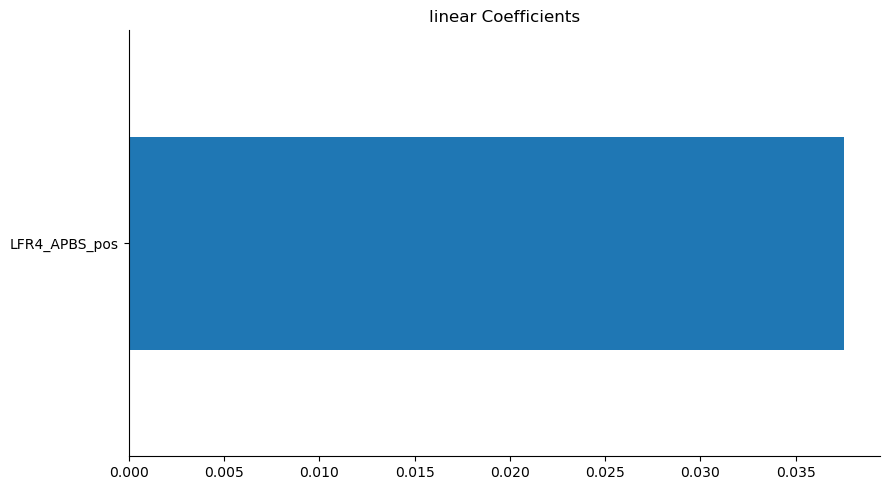

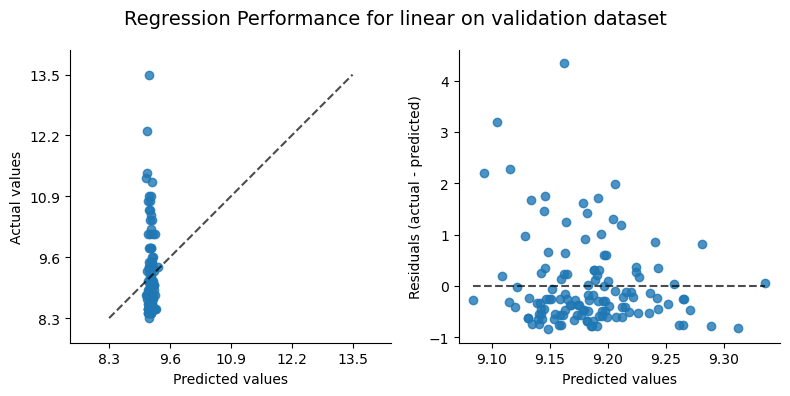

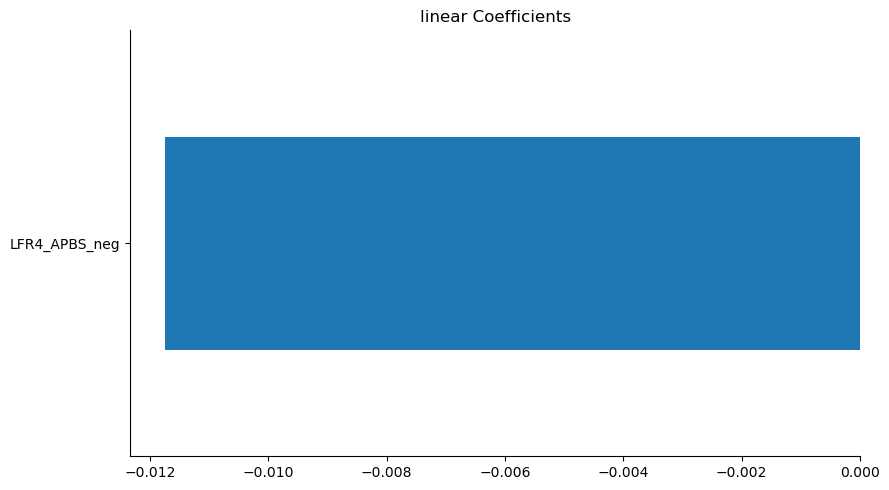

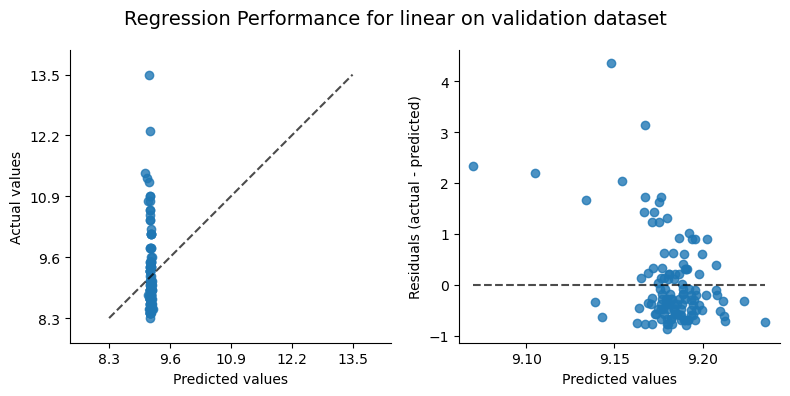

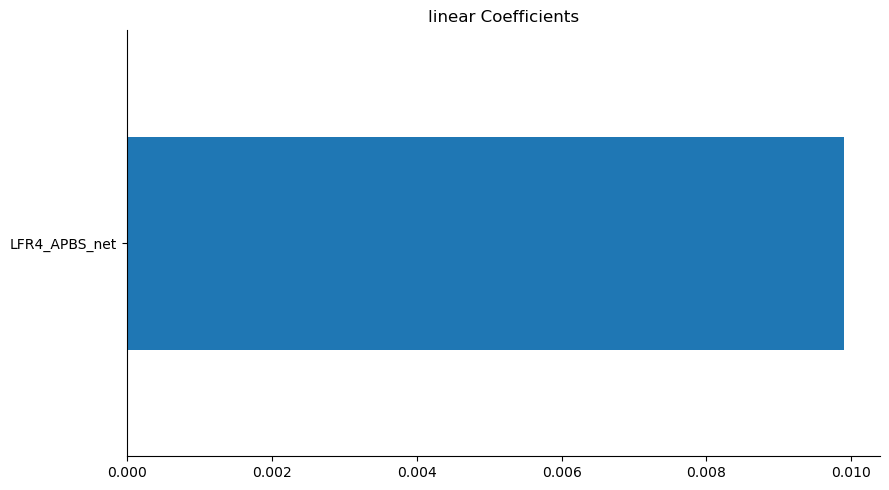

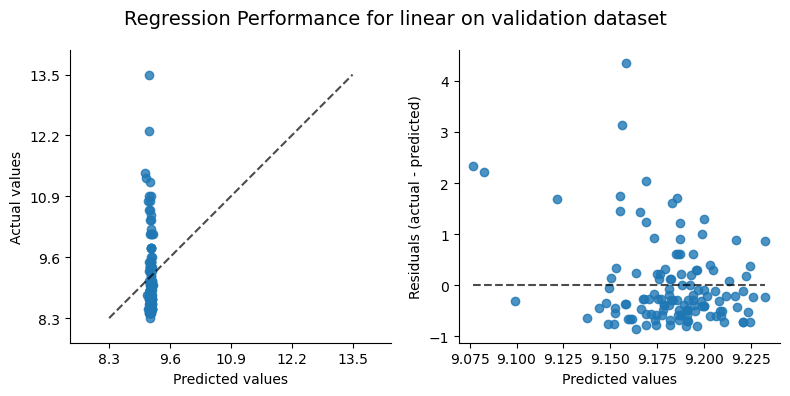

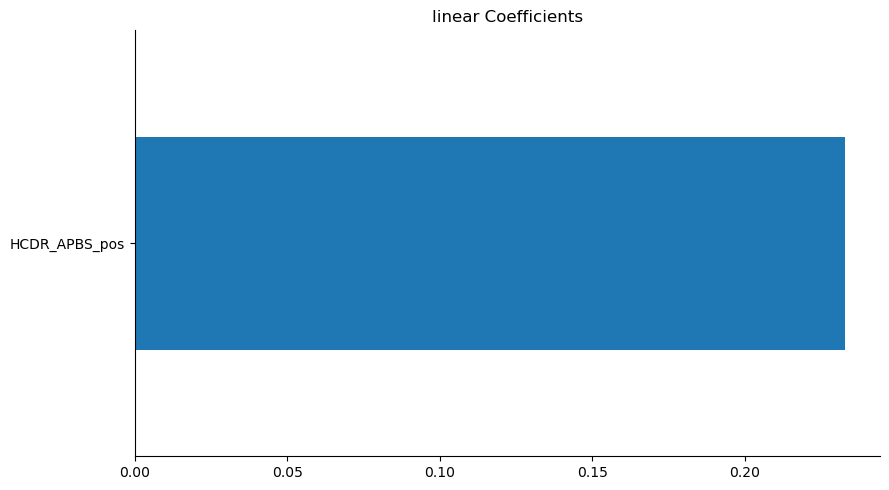

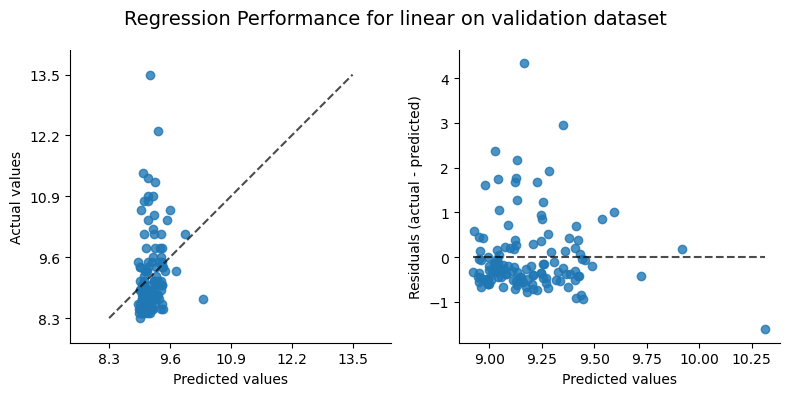

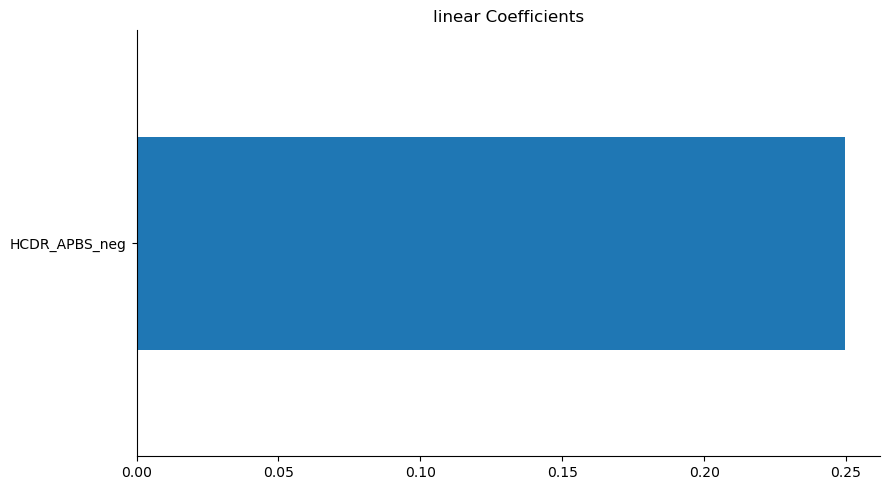

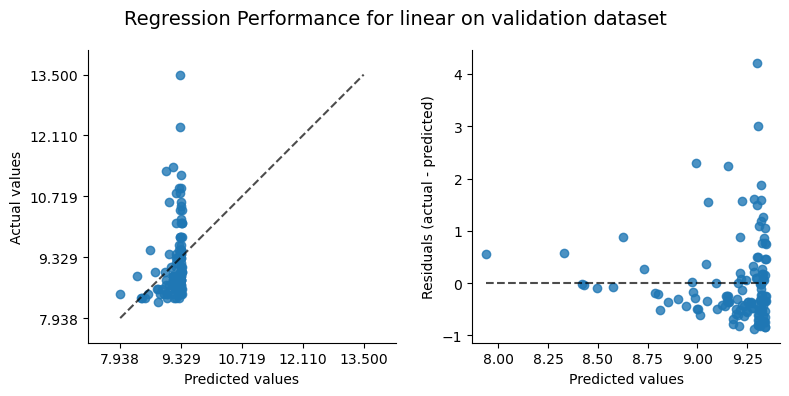

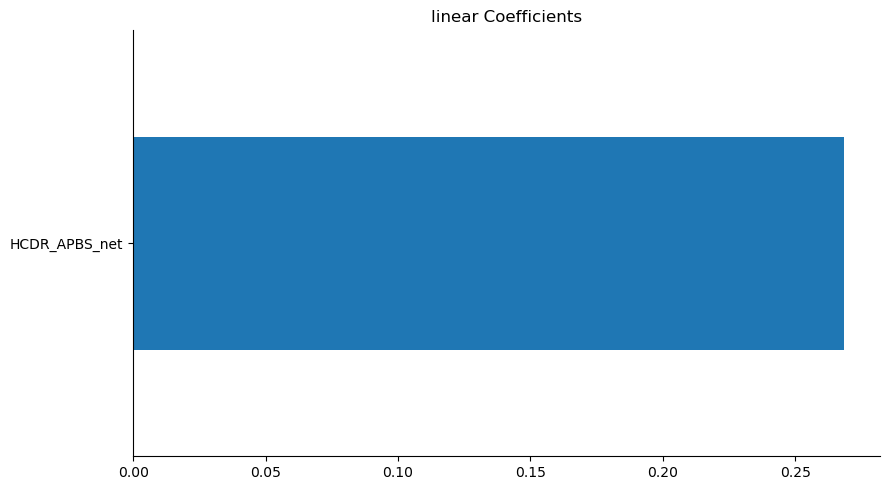

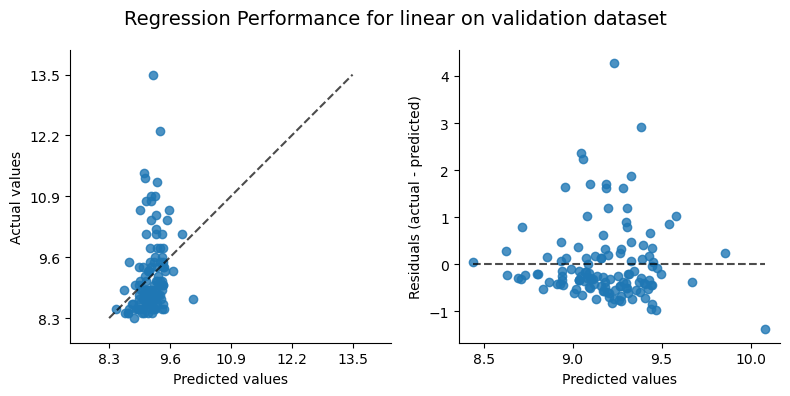

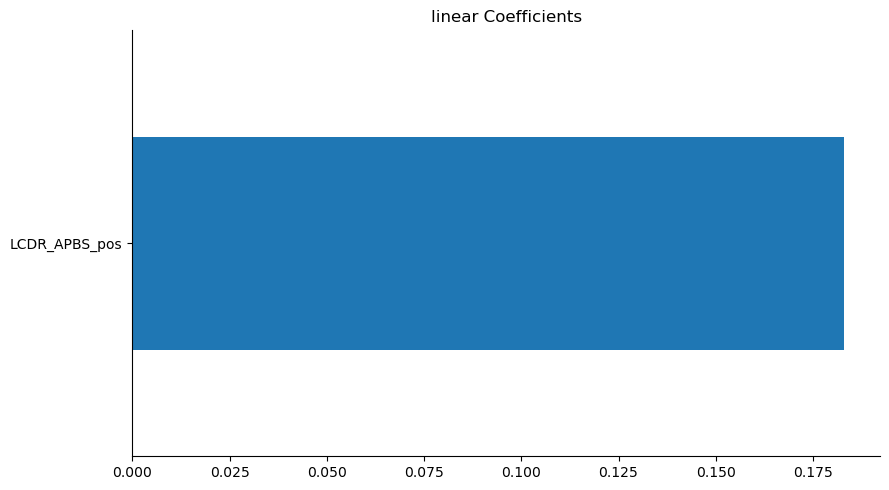

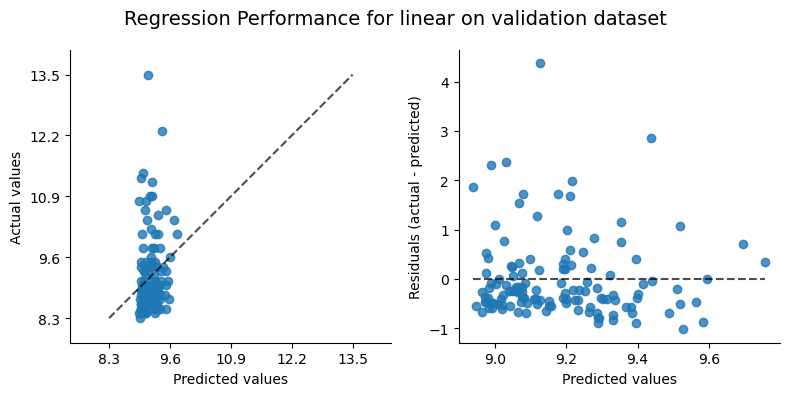

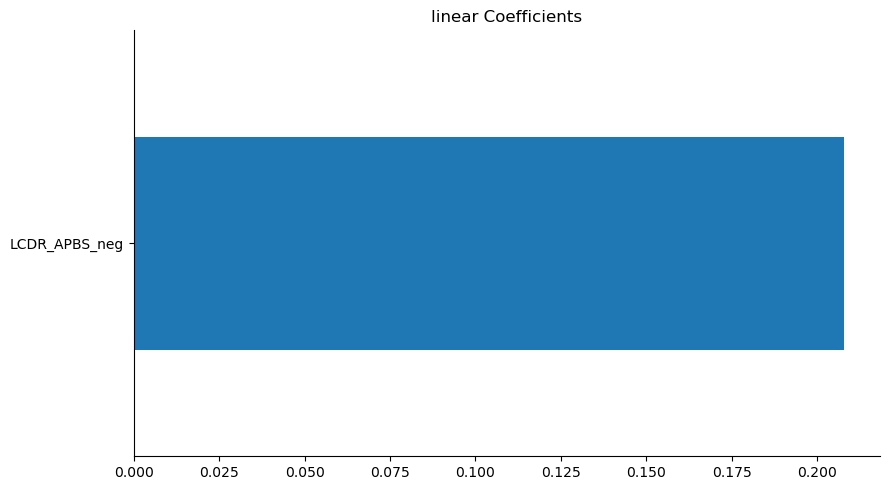

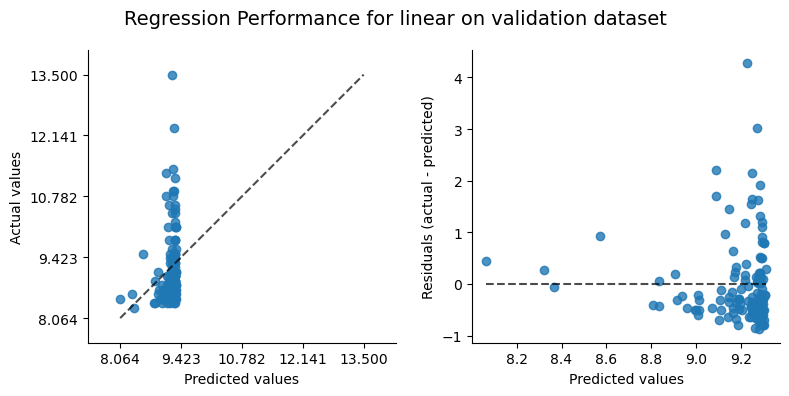

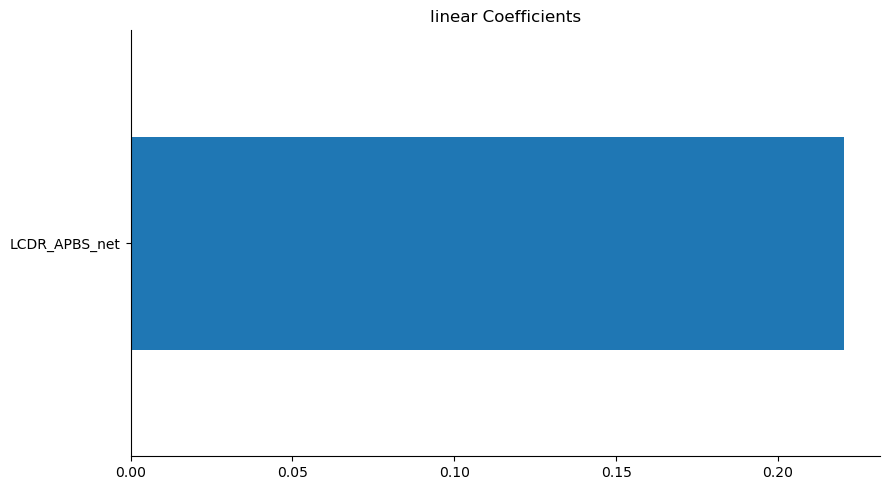

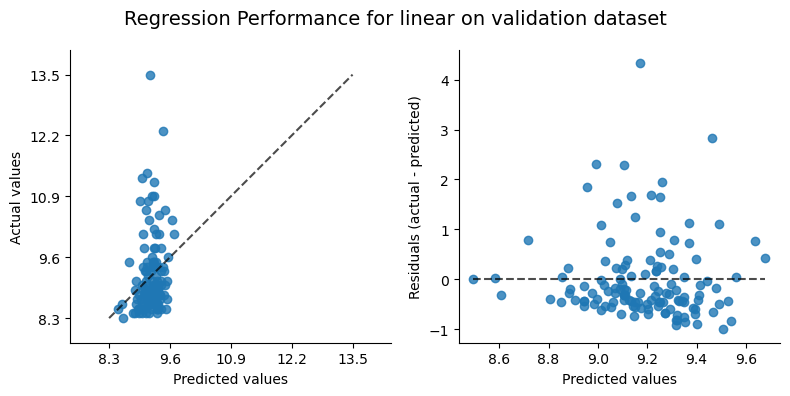

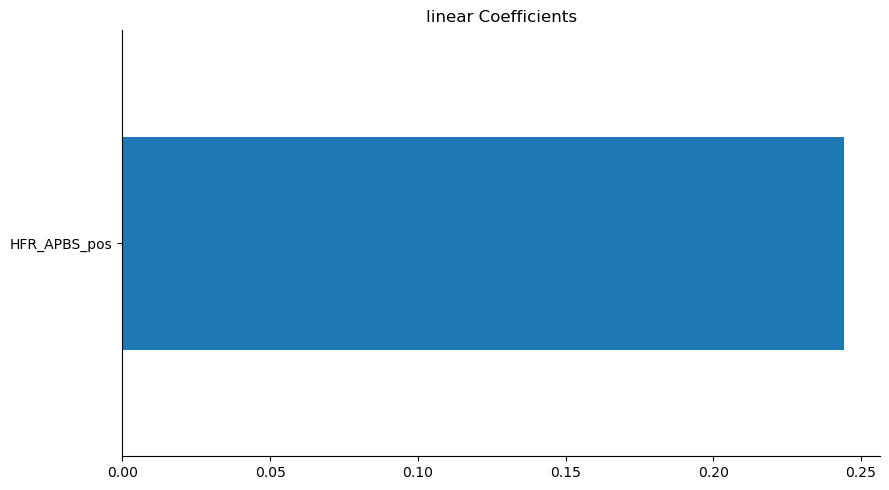

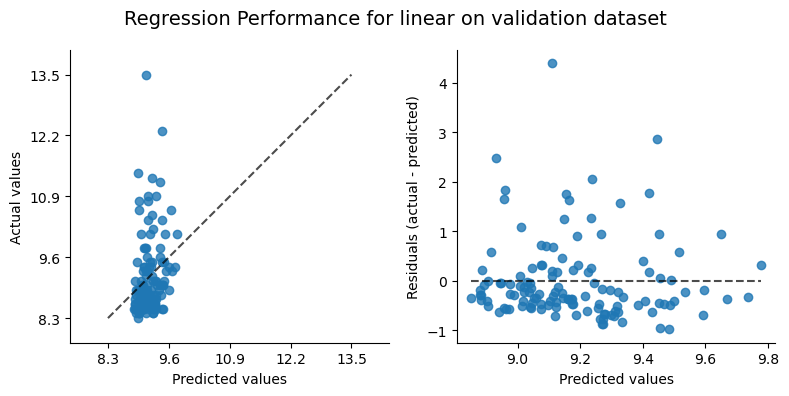

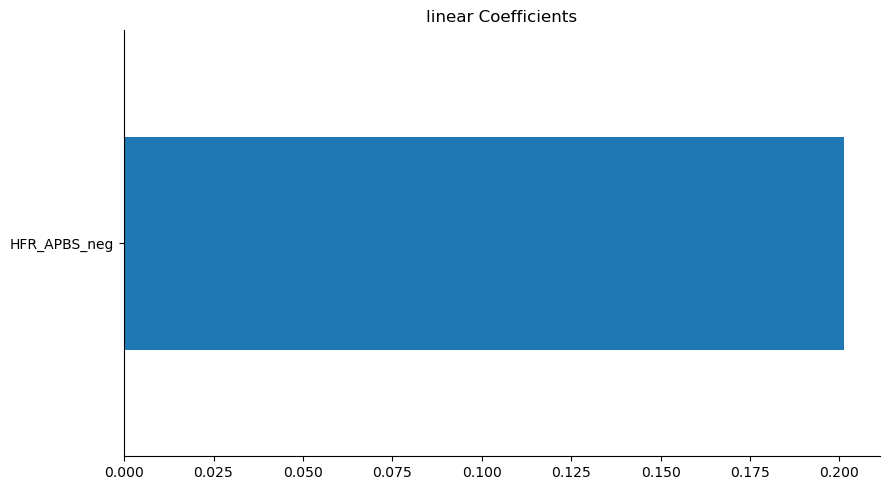

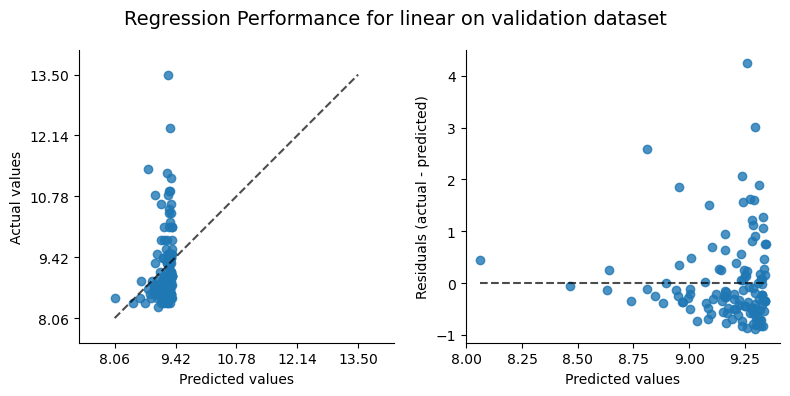

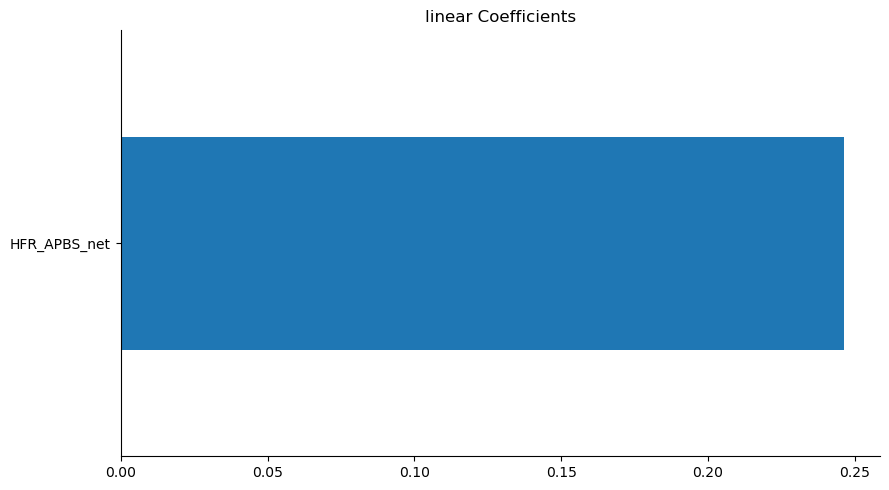

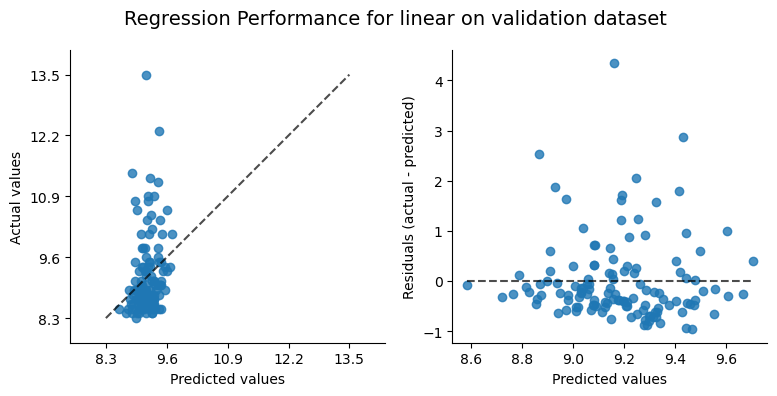

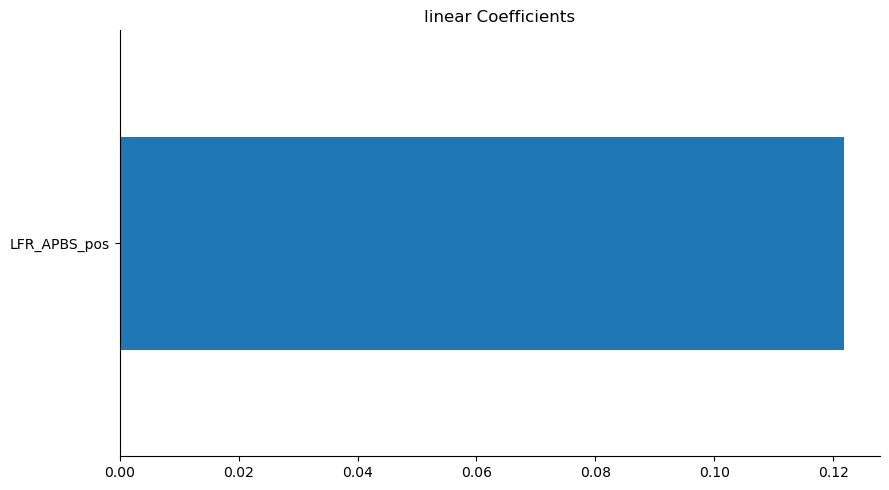

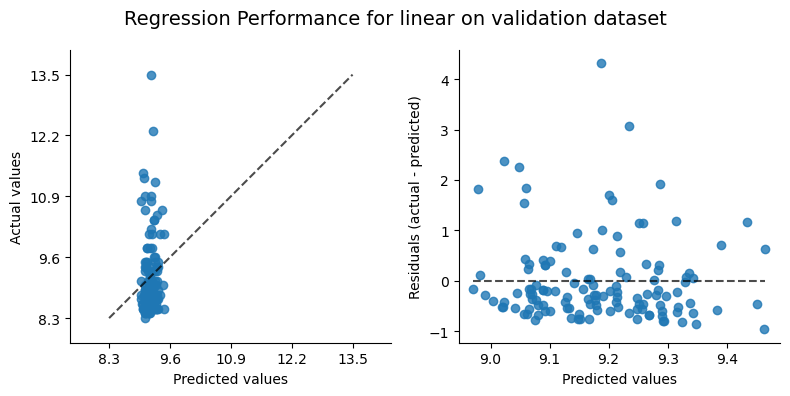

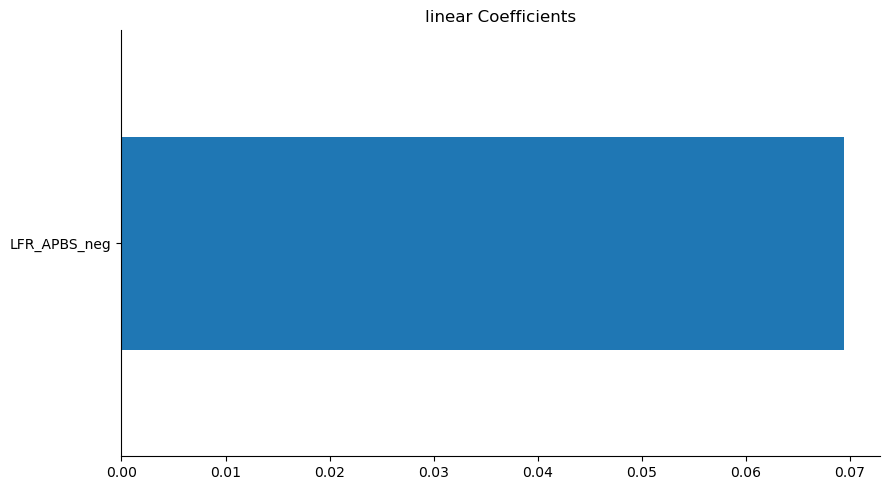

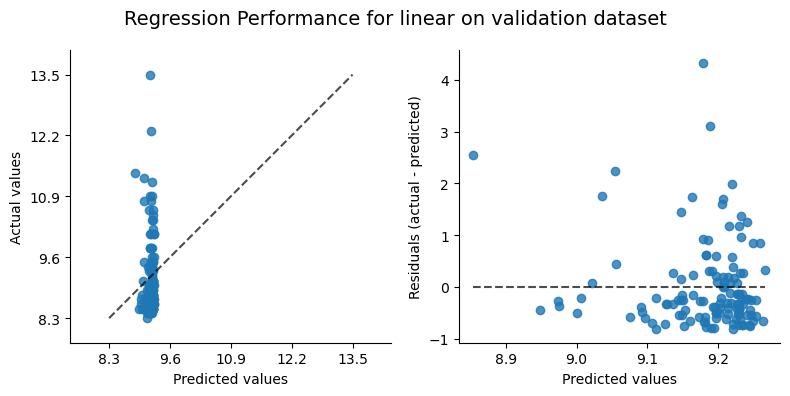

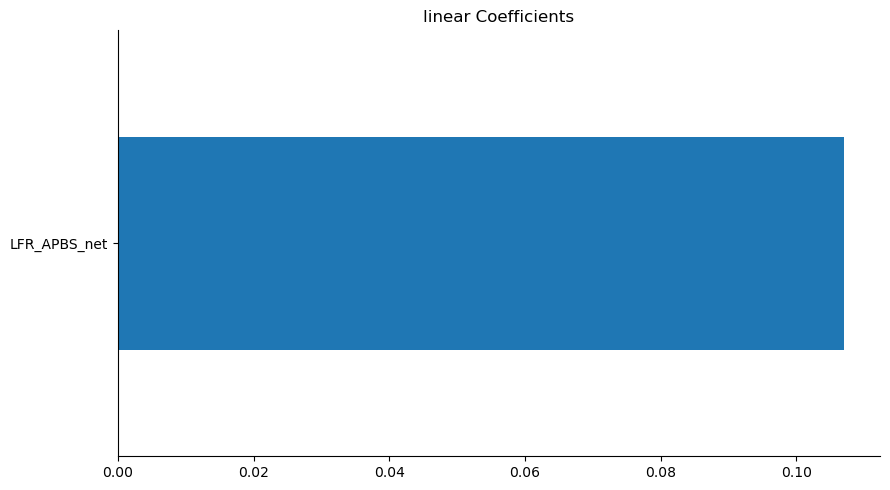

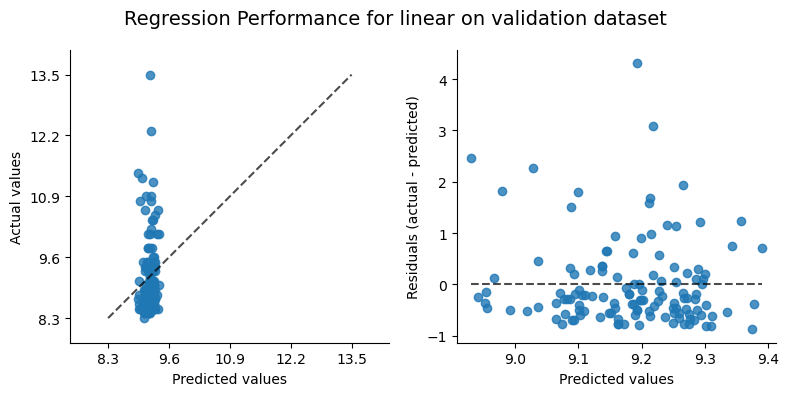

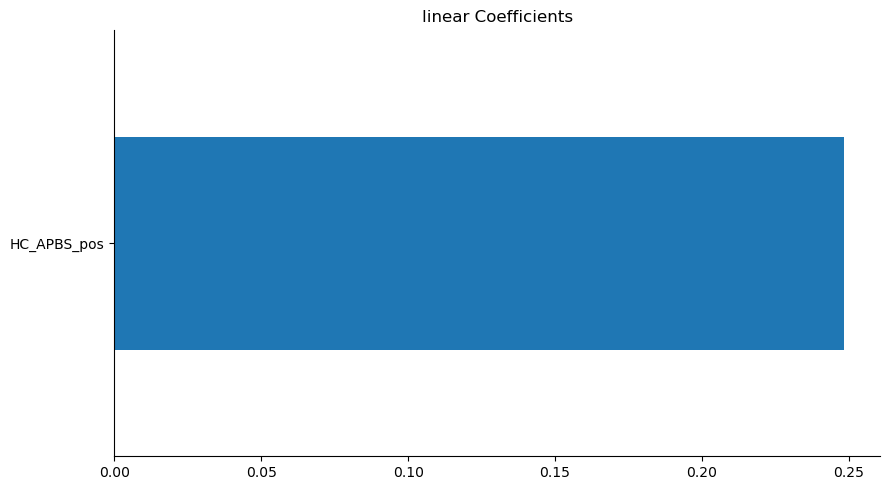

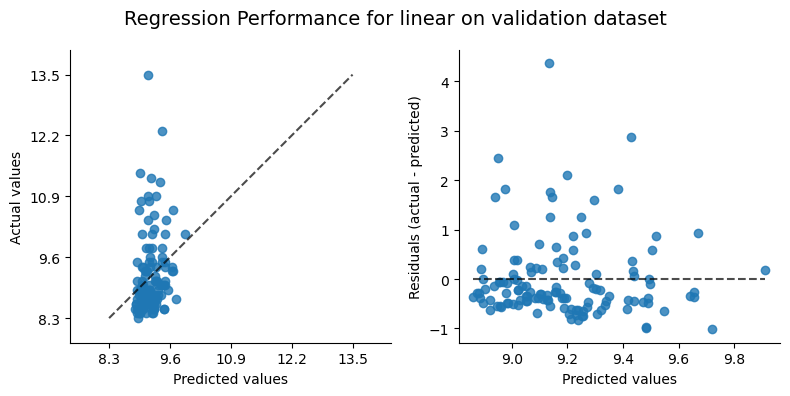

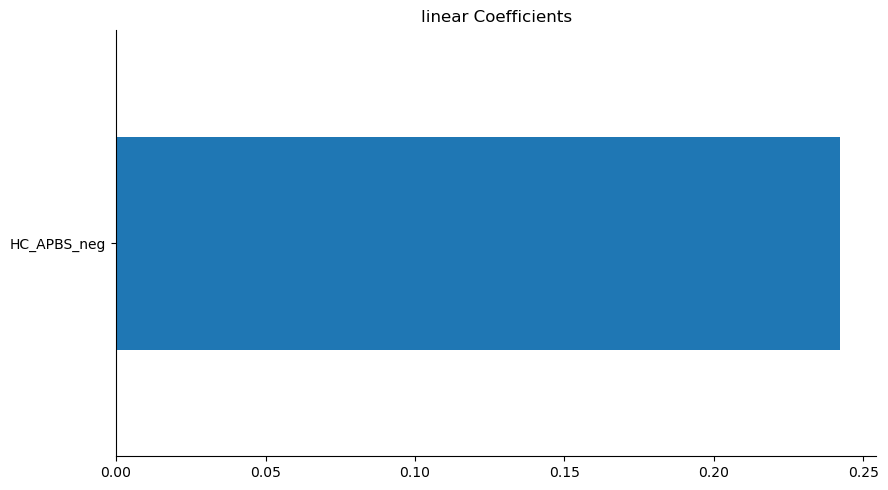

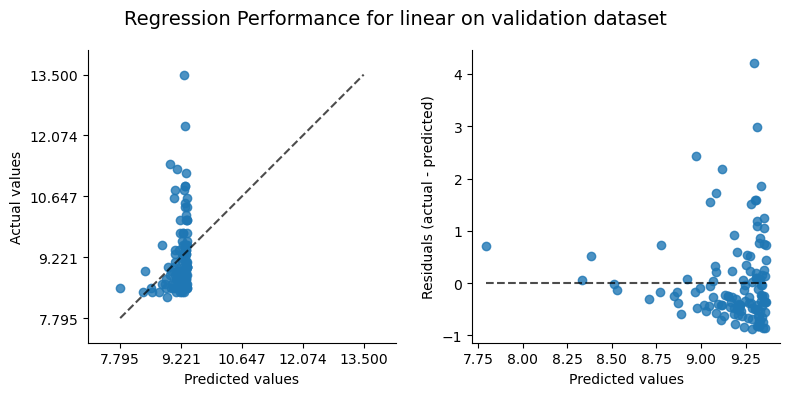

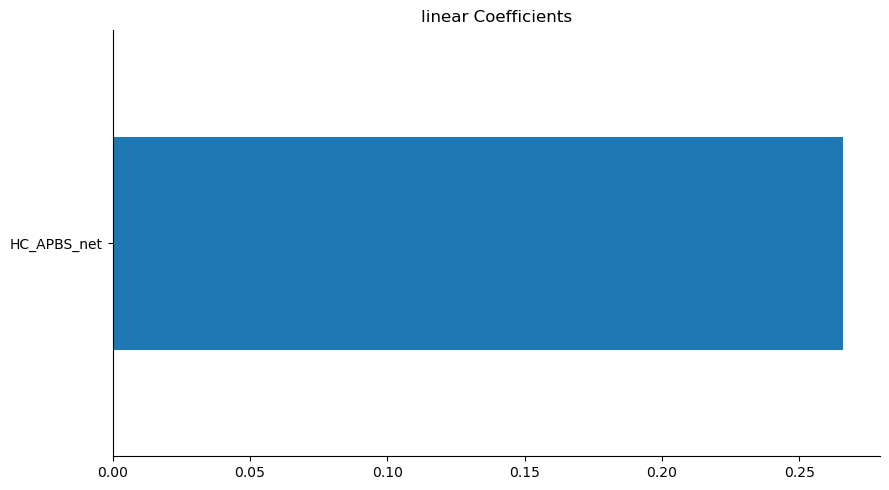

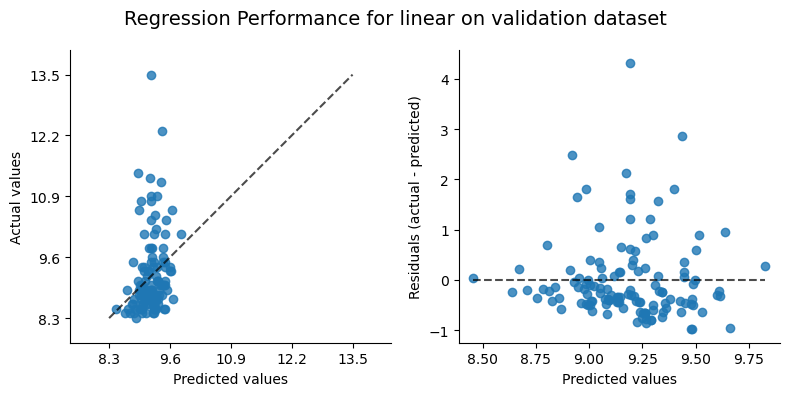

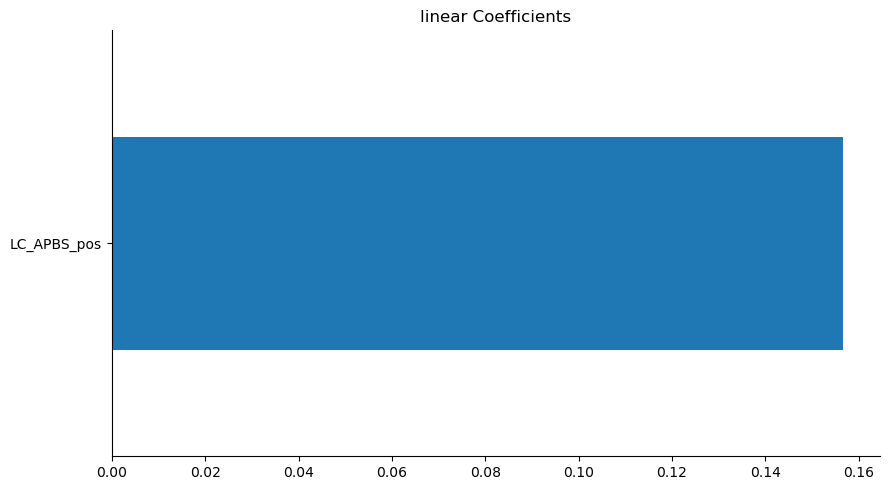

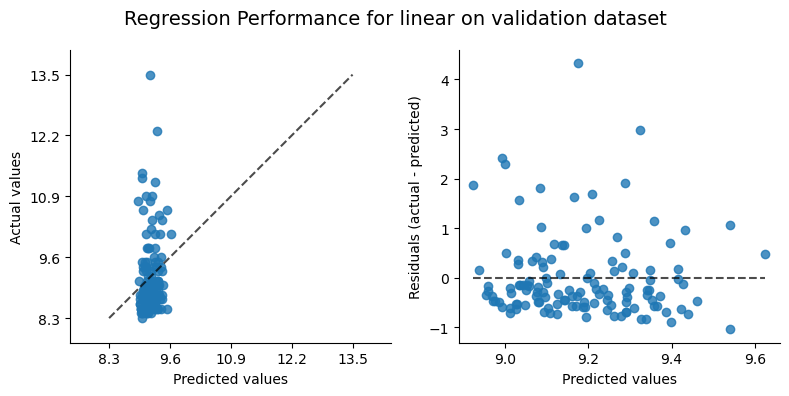

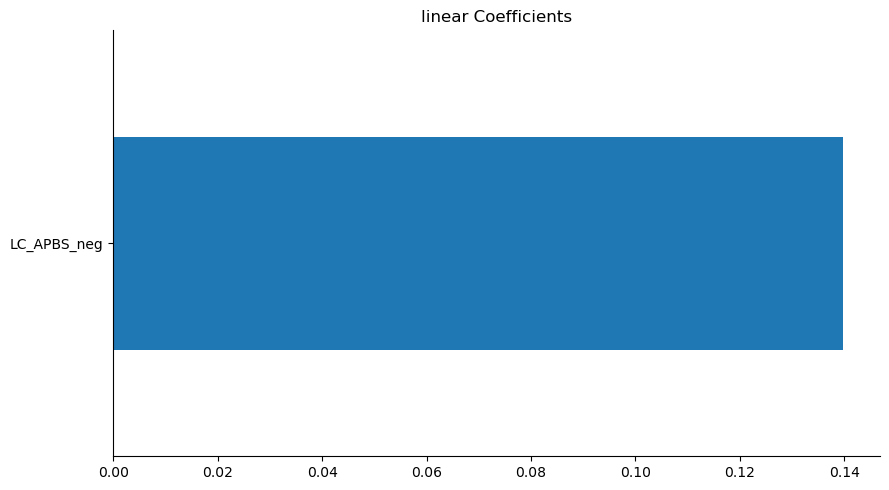

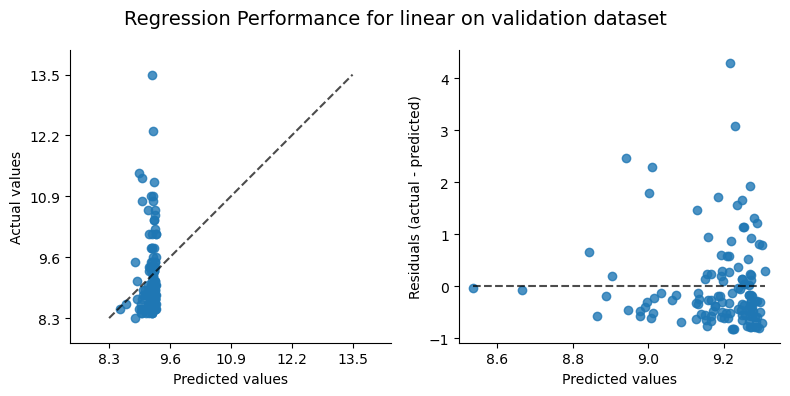

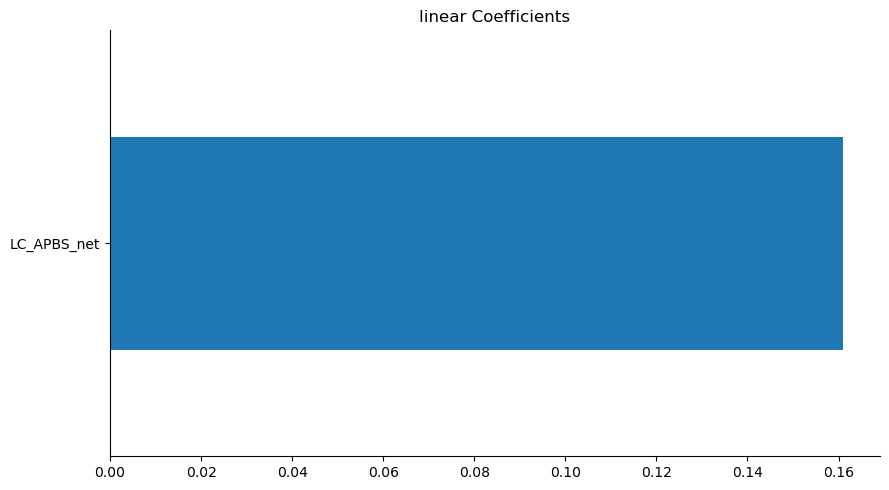

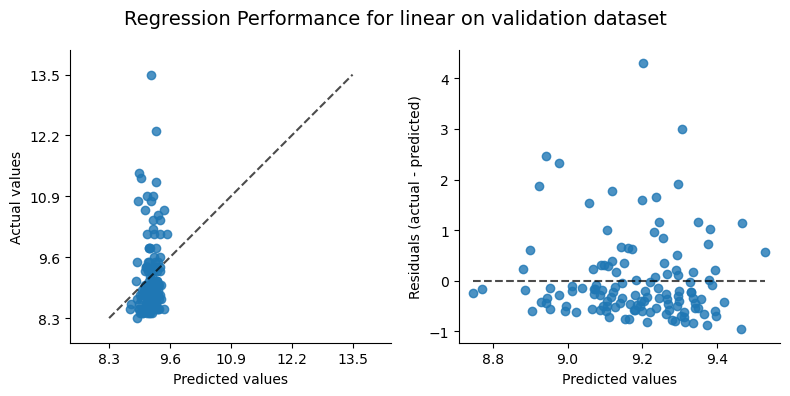

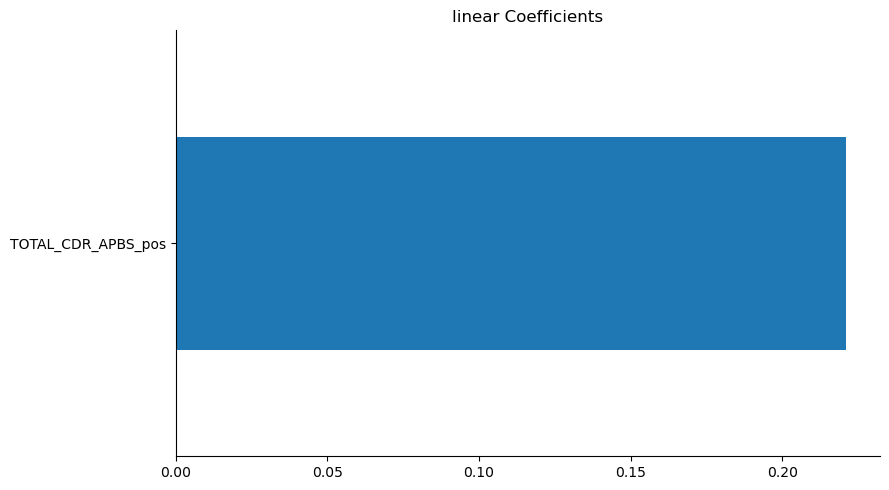

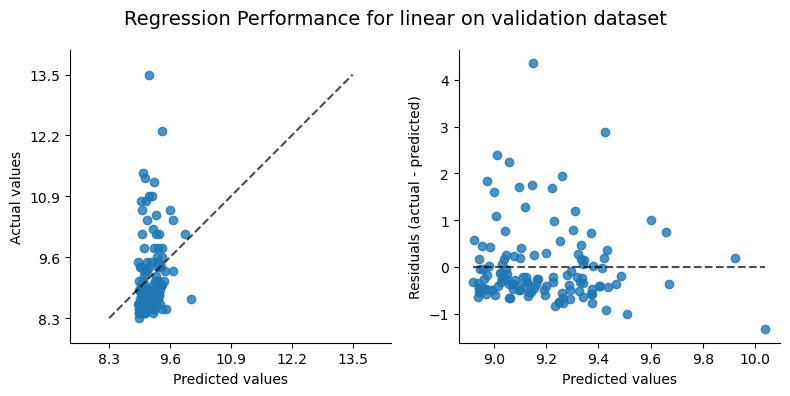

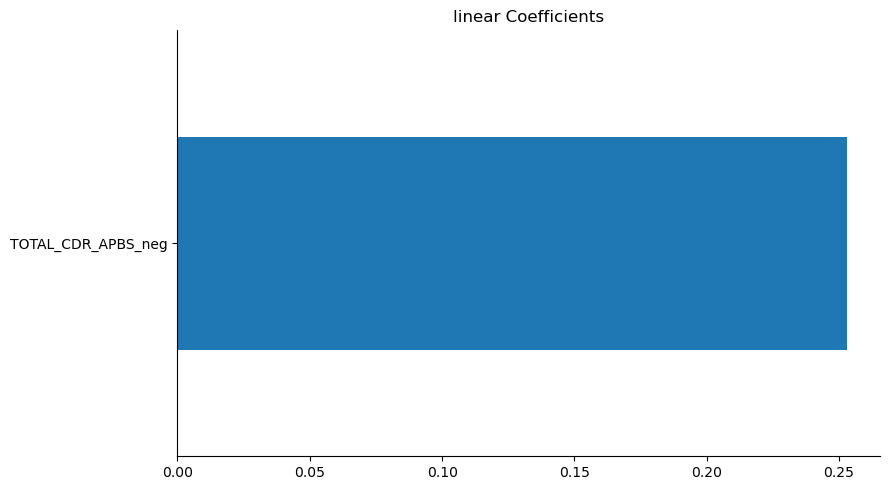

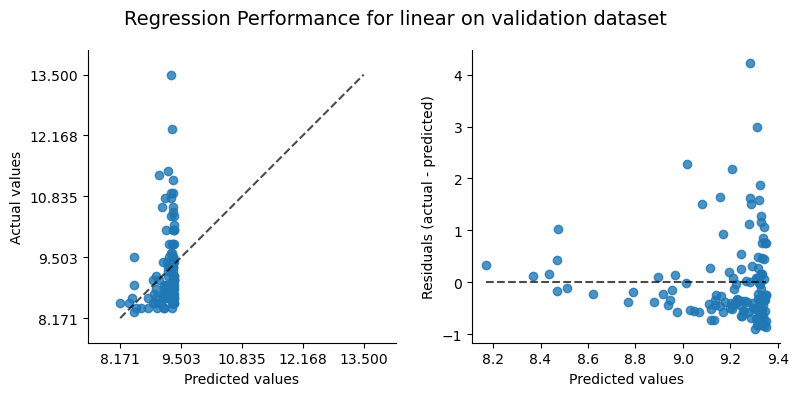

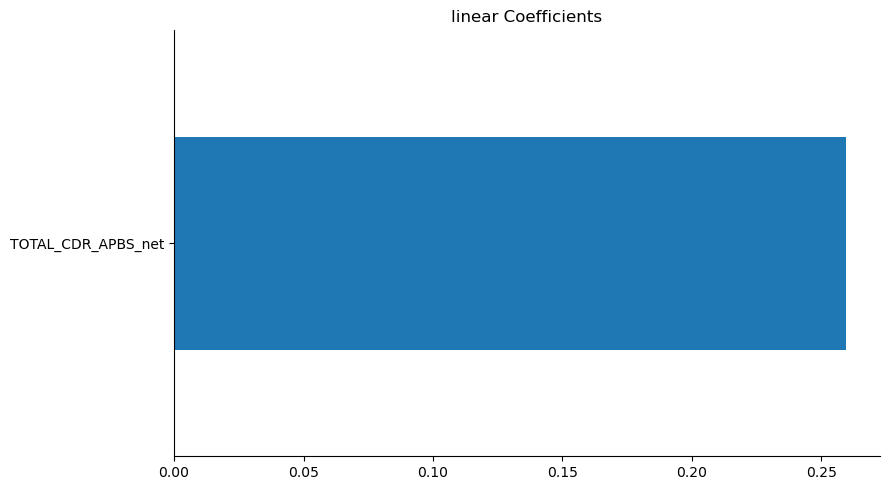

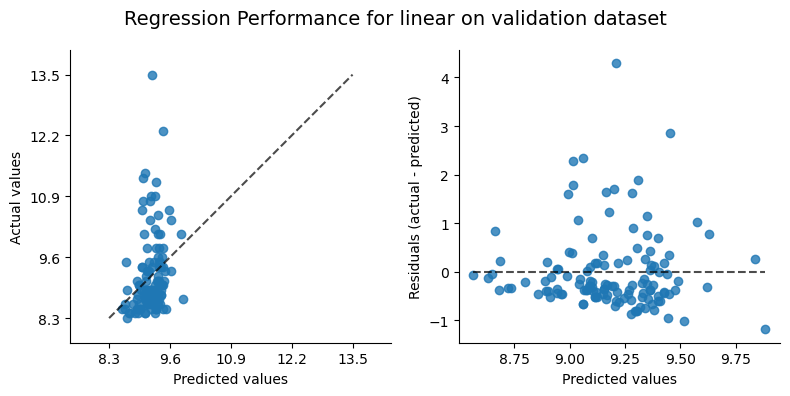

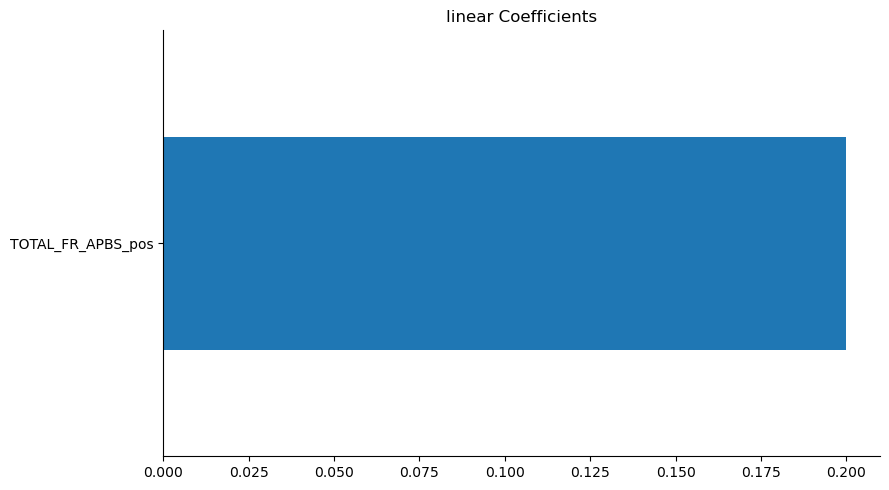

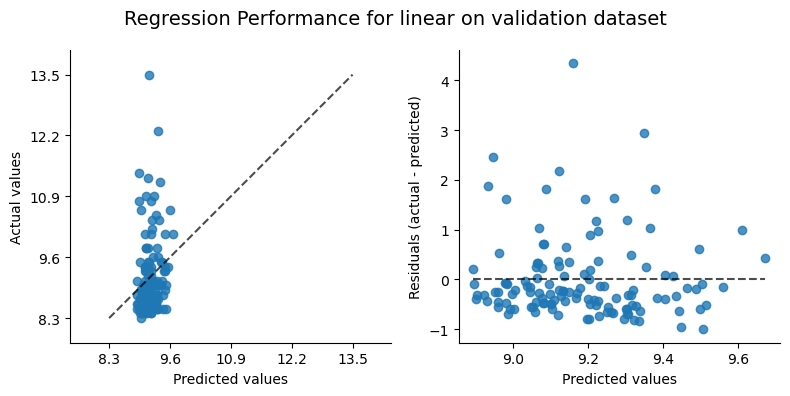

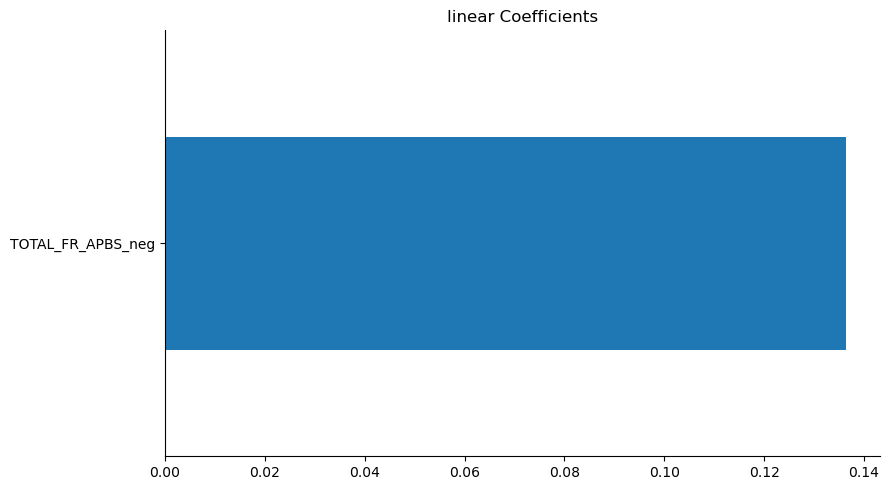

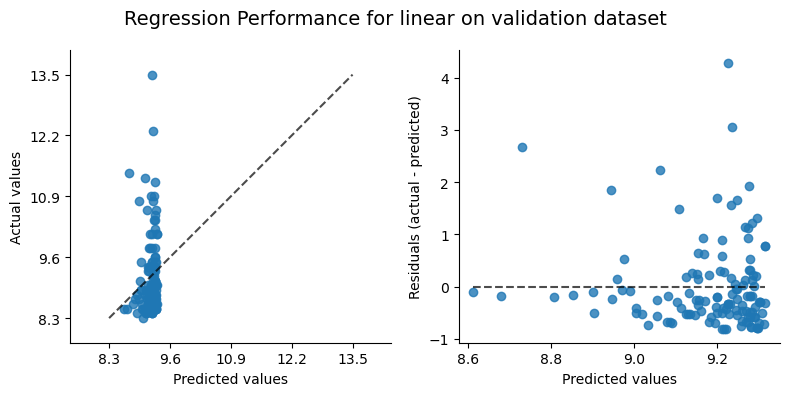

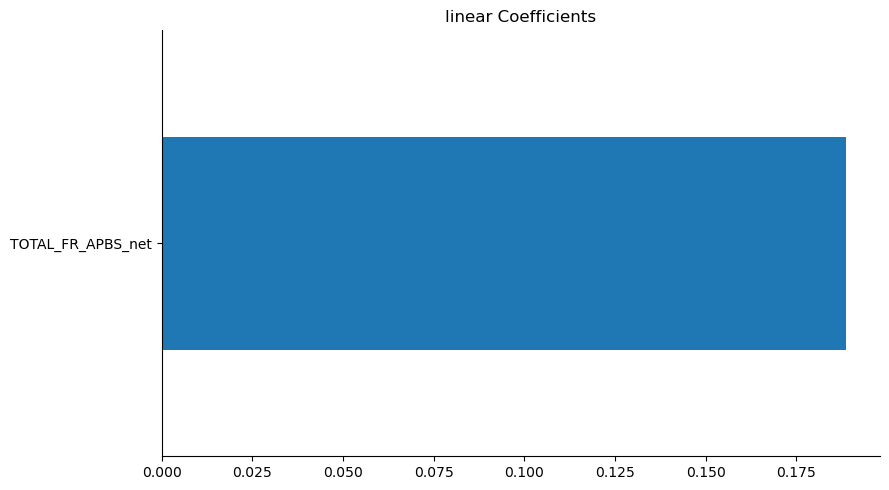

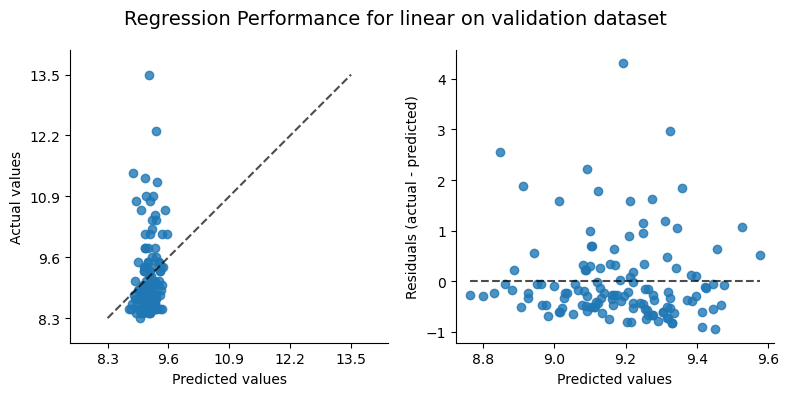

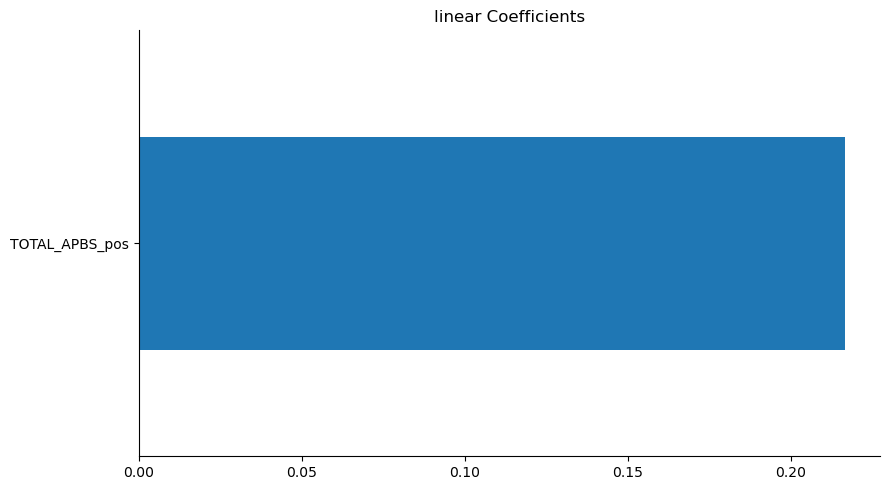

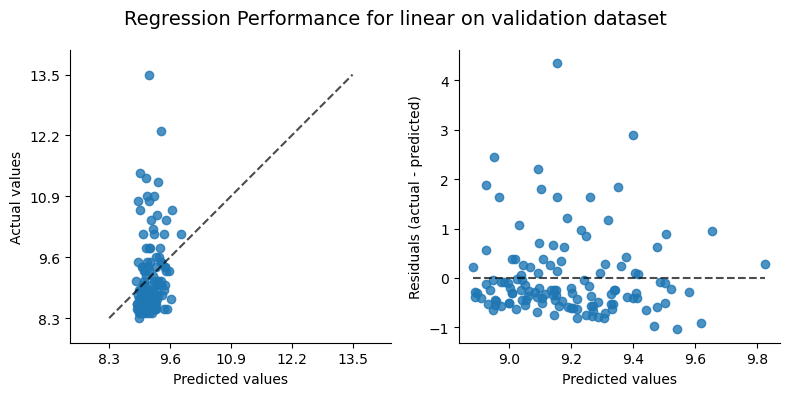

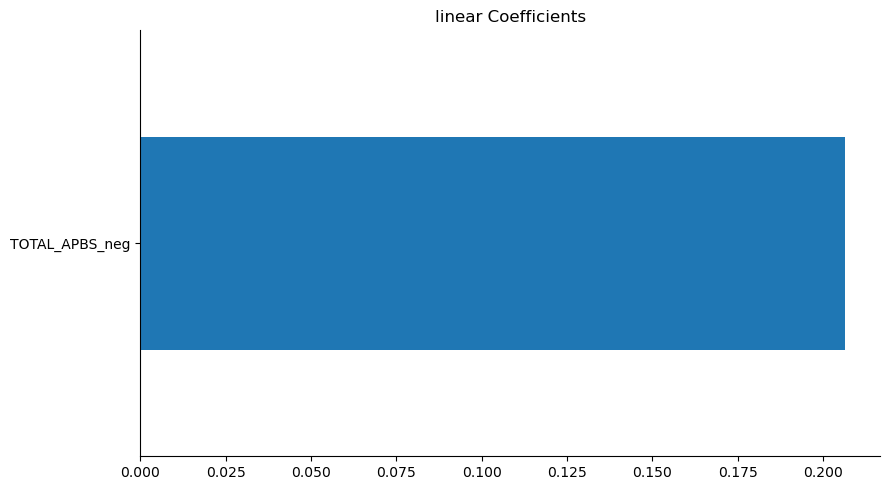

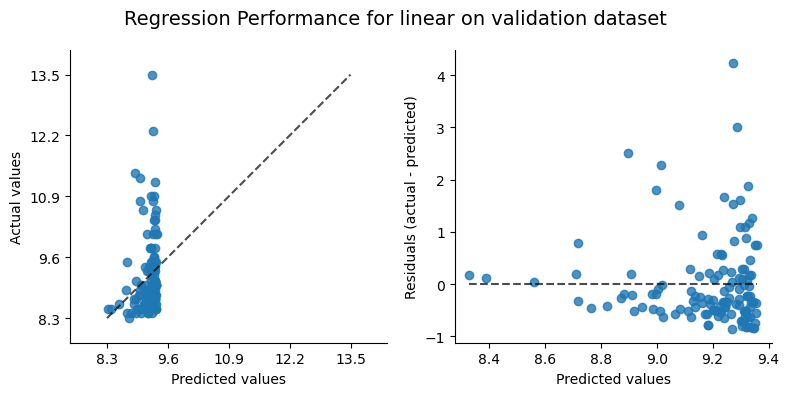

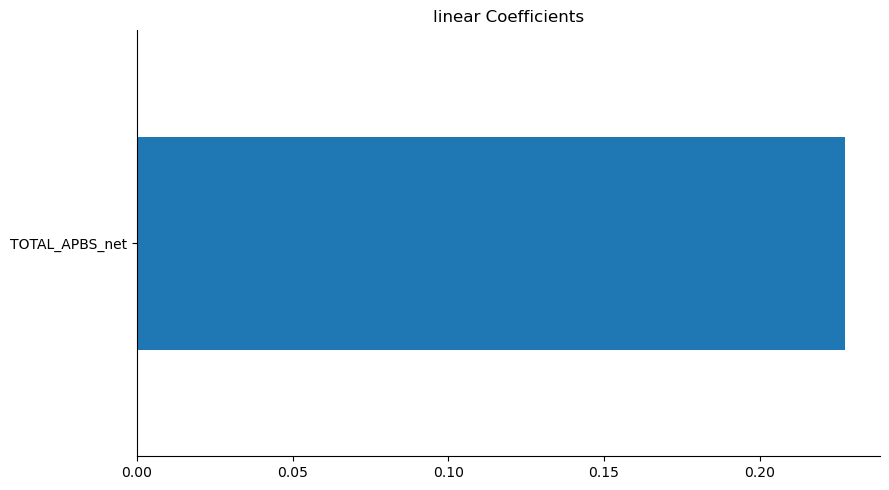

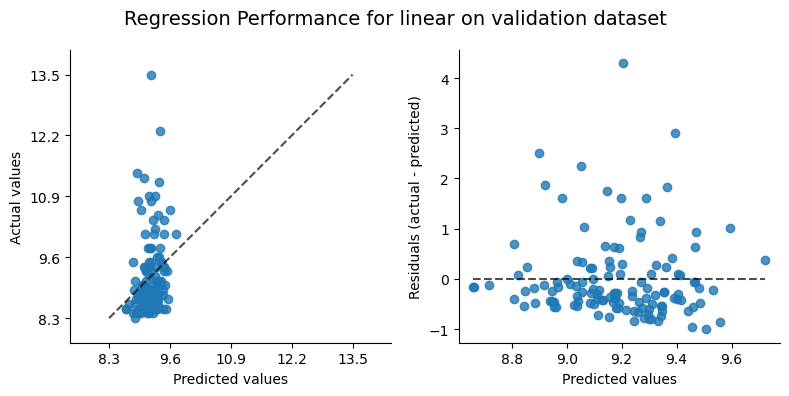

In [11]:
experiment.train_models()